In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import PyHyperScattering
import os
import re
import glob
import shutil
import psutil
import pickle
import imageio
from PIL import Image
import numpy as np
import pandas as pd
import xarray as xr
import matplotlib as mpl
import matplotlib.ticker as ticker
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
import scipy.ndimage as nd
from matplotlib import font_manager
from matplotlib.colors import LogNorm
from matplotlib.colorbar import Colorbar as colorbar
from IPython.display import clear_output

Imports failed.  Are you running on a machine with proper libraries for databroker, tiled, etc.?


In [3]:
# variables to store directories, enables easy switching between systems
font_dirs = ['C:/Users/Phong/Box/Research/Mixed Conduction Project/RSOXS Projects/Shared RSoXS Folder/Fonts/']

# pickle_save_name = 'PyHyperScattering_Batch_CyRSoXS.pkl'
# scan_save_name = 'CyRSoXS_Scans.pkl'
# base_data_dirs = [r'C:\Users\Phong\Desktop\CyRSoXS\v4_sims\sims\Reduced_F4TCNQ\C_K_Edge_Reduced_F4TCNQ\Phong_Pickled_Morphologies_v4_C_Undoped\100-400nm\Average_Oriented\1024x1024x512nm_pitch2nm_rad15nm_std3nm_1250fib_100-400nm',
#                  r'C:\Users\Phong\Desktop\CyRSoXS\v4_sims\sims\Reduced_F4TCNQ\C_K_Edge_Reduced_F4TCNQ\Phong_Pickled_Morphologies_v4_C_TFSI_Everywhere\100-400nm\Average_Oriented\1024x1024x512nm_pitch2nm_rad15nm_std3nm_1250fib_100-400nm',
#                  r'C:\Users\Phong\Desktop\CyRSoXS\v4_sims\sims\Reduced_F4TCNQ\C_K_Edge_Reduced_F4TCNQ\Phong_Pickled_Morphologies_v4_C_TFSI_Matrix\100-400nm\Average_Oriented\1024x1024x512nm_pitch2nm_rad15nm_std3nm_1250fib_100-400nm',
#                  r'C:\Users\Phong\Desktop\CyRSoXS\v4_sims\sims\Reduced_F4TCNQ\C_K_Edge_Reduced_F4TCNQ\Phong_Pickled_Morphologies_v4_C_TFSI_Fibril\100-400nm\Average_Oriented\1024x1024x512nm_pitch2nm_rad15nm_std3nm_1250fib_100-400nm',
#                  r'C:\Users\Phong\Desktop\CyRSoXS\v4_sims\sims\Reduced_F4TCNQ\C_K_Edge_Reduced_F4TCNQ\Phong_Pickled_Morphologies_v4_C_Undoped\100-400nm\Average_Oriented\1024x1024x512nm_pitch2nm_rad15nm_std3nm_1250fib_100-400nm',
#                  r'C:\Users\Phong\Desktop\CyRSoXS\v4_sims\sims\Reduced_F4TCNQ\C_K_Edge_Reduced_F4TCNQ\Phong_Pickled_Morphologies_v4_C_F4TCNQ_Everywhere\100-400nm\Average_Oriented\1024x1024x512nm_pitch2nm_rad15nm_std3nm_1250fib_100-400nm',
#                  r'C:\Users\Phong\Desktop\CyRSoXS\v4_sims\sims\Reduced_F4TCNQ\C_K_Edge_Reduced_F4TCNQ\Phong_Pickled_Morphologies_v4_C_F4TCNQ_Matrix\100-400nm\Average_Oriented\1024x1024x512nm_pitch2nm_rad15nm_std3nm_1250fib_100-400nm',
#                  r'C:\Users\Phong\Desktop\CyRSoXS\v4_sims\sims\Reduced_F4TCNQ\C_K_Edge_Reduced_F4TCNQ\Phong_Pickled_Morphologies_v4_C_F4TCNQ_Fibril\100-400nm\Average_Oriented\1024x1024x512nm_pitch2nm_rad15nm_std3nm_1250fib_100-400nm',
#                  r'C:\Users\Phong\Desktop\CyRSoXS\v4_sims\sims\Reduced_F4TCNQ\C_K_Edge_Reduced_F4TCNQ\Phong_Pickled_Morphologies_v4_C_Undoped\100-400nm\Average_Oriented\1024x1024x512nm_pitch2nm_rad15nm_std3nm_1250fib_100-400nm',
#                  r'C:\Users\Phong\Desktop\CyRSoXS\v4_sims\sims\Reduced_F4TCNQ\C_K_Edge_Reduced_F4TCNQ\Phong_Pickled_Morphologies_v4_C_Para_F4TCNQ_Everywhere\100-400nm\Average_Oriented\1024x1024x512nm_pitch2nm_rad15nm_std3nm_1250fib_100-400nm',
#                  r'C:\Users\Phong\Desktop\CyRSoXS\v4_sims\sims\Reduced_F4TCNQ\C_K_Edge_Reduced_F4TCNQ\Phong_Pickled_Morphologies_v4_C_Para_F4TCNQ_Matrix\100-400nm\Average_Oriented\1024x1024x512nm_pitch2nm_rad15nm_std3nm_1250fib_100-400nm',
#                  r'C:\Users\Phong\Desktop\CyRSoXS\v4_sims\sims\Reduced_F4TCNQ\C_K_Edge_Reduced_F4TCNQ\Phong_Pickled_Morphologies_v4_C_Para_F4TCNQ_Fibril\100-400nm\Average_Oriented\1024x1024x512nm_pitch2nm_rad15nm_std3nm_1250fib_100-400nm',
#                  r'C:\Users\Phong\Desktop\CyRSoXS\v4_sims\sims\Reduced_F4TCNQ\C_K_Edge_Reduced_F4TCNQ\Phong_Pickled_Morphologies_v4_C_Undoped\100-400nm\Average_Oriented\1024x1024x512nm_pitch2nm_rad15nm_std3nm_1250fib_100-400nm',
#                  r'C:\Users\Phong\Desktop\CyRSoXS\v4_sims\sims\Reduced_F4TCNQ\C_K_Edge_Reduced_F4TCNQ\Phong_Pickled_Morphologies_v4_C_Perp_F4TCNQ_Everywhere\100-400nm\Average_Oriented\1024x1024x512nm_pitch2nm_rad15nm_std3nm_1250fib_100-400nm',
#                  r'C:\Users\Phong\Desktop\CyRSoXS\v4_sims\sims\Reduced_F4TCNQ\C_K_Edge_Reduced_F4TCNQ\Phong_Pickled_Morphologies_v4_C_Perp_F4TCNQ_Matrix\100-400nm\Average_Oriented\1024x1024x512nm_pitch2nm_rad15nm_std3nm_1250fib_100-400nm',
#                  r'C:\Users\Phong\Desktop\CyRSoXS\v4_sims\sims\Reduced_F4TCNQ\C_K_Edge_Reduced_F4TCNQ\Phong_Pickled_Morphologies_v4_C_Perp_F4TCNQ_Fibril\100-400nm\Average_Oriented\1024x1024x512nm_pitch2nm_rad15nm_std3nm_1250fib_100-400nm']

# pickle_save_name = 'PyHyperScattering_Batch_CyRSoXS_Orientation.pkl'
# scan_save_name = 'CyRSoXS_Scans_Orientation.pkl'
# base_data_dirs = [r'C:\Users\Phong\Desktop\CyRSoXS\v4_sims\sims\Reduced_F4TCNQ\C_K_Edge_Reduced_F4TCNQ\Phong_Pickled_Morphologies_v4_C_Undoped\100-400nm\Least_Oriented\1024x1024x512nm_pitch2nm_rad15nm_std3nm_1000fib_100-400nm',
#                  r'C:\Users\Phong\Desktop\CyRSoXS\v4_sims\sims\Reduced_F4TCNQ\C_K_Edge_Reduced_F4TCNQ\Phong_Pickled_Morphologies_v4_C_Undoped\100-400nm\Average_Oriented\1024x1024x512nm_pitch2nm_rad15nm_std3nm_1000fib_100-400nm',
#                  r'C:\Users\Phong\Desktop\CyRSoXS\v4_sims\sims\Reduced_F4TCNQ\C_K_Edge_Reduced_F4TCNQ\Phong_Pickled_Morphologies_v4_C_Undoped\100-400nm\Average_Oriented\1024x1024x512nm_pitch2nm_rad15nm_std3nm_1000fib_100-400nm']

# pickle_save_name = 'PyHyperScattering_Batch_CyRSoXS_Direct.pkl'
# scan_save_name = 'CyRSoXS_Scans_Direct.pkl'
# base_data_dirs = [r'C:\Users\Phong\Desktop\CyRSoXS\v4_sims\sims\Reduced_F4TCNQ\C_K_Edge_Reduced_F4TCNQ\Phong_Pickled_Morphologies_v4_C_Undoped\100-400nm\Average_Oriented\1024x1024x512nm_pitch2nm_rad15nm_std3nm_250fib_100-400nm',
#                  r'C:\Users\Phong\Desktop\CyRSoXS\v4_sims\sims\Reduced_F4TCNQ\C_K_Edge_Reduced_F4TCNQ\Phong_Pickled_Morphologies_v4_C_Perp_F4TCNQ_Fibril\100-400nm\Average_Oriented\1024x1024x512nm_pitch2nm_rad15nm_std3nm_250fib_100-400nm',
#                  r'C:\Users\Phong\Desktop\CyRSoXS\v4_sims\sims\Reduced_F4TCNQ\C_K_Edge_Reduced_F4TCNQ\Phong_Pickled_Morphologies_v4_C_TFSI_Fibril\100-400nm\Average_Oriented\1024x1024x512nm_pitch2nm_rad15nm_std3nm_250fib_100-400nm',
#                  r'C:\Users\Phong\Desktop\CyRSoXS\v4_sims\sims\Reduced_F4TCNQ\C_K_Edge_Reduced_F4TCNQ\Phong_Pickled_Morphologies_v4_C_Undoped\100-400nm\Average_Oriented\1024x1024x512nm_pitch2nm_rad15nm_std3nm_500fib_100-400nm',
#                  r'C:\Users\Phong\Desktop\CyRSoXS\v4_sims\sims\Reduced_F4TCNQ\C_K_Edge_Reduced_F4TCNQ\Phong_Pickled_Morphologies_v4_C_Perp_F4TCNQ_Fibril\100-400nm\Average_Oriented\1024x1024x512nm_pitch2nm_rad15nm_std3nm_500fib_100-400nm',
#                  r'C:\Users\Phong\Desktop\CyRSoXS\v4_sims\sims\Reduced_F4TCNQ\C_K_Edge_Reduced_F4TCNQ\Phong_Pickled_Morphologies_v4_C_TFSI_Fibril\100-400nm\Average_Oriented\1024x1024x512nm_pitch2nm_rad15nm_std3nm_500fib_100-400nm',
#                  r'C:\Users\Phong\Desktop\CyRSoXS\v4_sims\sims\Reduced_F4TCNQ\C_K_Edge_Reduced_F4TCNQ\Phong_Pickled_Morphologies_v4_C_Undoped\100-400nm\Average_Oriented\1024x1024x512nm_pitch2nm_rad15nm_std3nm_750fib_100-400nm',
#                  r'C:\Users\Phong\Desktop\CyRSoXS\v4_sims\sims\Reduced_F4TCNQ\C_K_Edge_Reduced_F4TCNQ\Phong_Pickled_Morphologies_v4_C_Perp_F4TCNQ_Fibril\100-400nm\Average_Oriented\1024x1024x512nm_pitch2nm_rad15nm_std3nm_750fib_100-400nm',
#                  r'C:\Users\Phong\Desktop\CyRSoXS\v4_sims\sims\Reduced_F4TCNQ\C_K_Edge_Reduced_F4TCNQ\Phong_Pickled_Morphologies_v4_C_TFSI_Fibril\100-400nm\Average_Oriented\1024x1024x512nm_pitch2nm_rad15nm_std3nm_750fib_100-400nm',
#                  r'C:\Users\Phong\Desktop\CyRSoXS\v4_sims\sims\Reduced_F4TCNQ\C_K_Edge_Reduced_F4TCNQ\Phong_Pickled_Morphologies_v4_C_Undoped\100-400nm\Average_Oriented\1024x1024x512nm_pitch2nm_rad15nm_std3nm_1250fib_100-400nm',
#                  r'C:\Users\Phong\Desktop\CyRSoXS\v4_sims\sims\Reduced_F4TCNQ\C_K_Edge_Reduced_F4TCNQ\Phong_Pickled_Morphologies_v4_C_Perp_F4TCNQ_Fibril\100-400nm\Average_Oriented\1024x1024x512nm_pitch2nm_rad15nm_std3nm_1250fib_100-400nm',
#                  r'C:\Users\Phong\Desktop\CyRSoXS\v4_sims\sims\Reduced_F4TCNQ\C_K_Edge_Reduced_F4TCNQ\Phong_Pickled_Morphologies_v4_C_TFSI_Fibril\100-400nm\Average_Oriented\1024x1024x512nm_pitch2nm_rad15nm_std3nm_1250fib_100-400nm',
#                  r'C:\Users\Phong\Desktop\CyRSoXS\v4_sims\sims\Reduced_F4TCNQ\C_K_Edge_Reduced_F4TCNQ\Phong_Pickled_Morphologies_v4_C_Undoped\100-400nm\Average_Oriented\1024x1024x512nm_pitch2nm_rad15nm_std3nm_1500fib_100-400nm',
#                  r'C:\Users\Phong\Desktop\CyRSoXS\v4_sims\sims\Reduced_F4TCNQ\C_K_Edge_Reduced_F4TCNQ\Phong_Pickled_Morphologies_v4_C_Perp_F4TCNQ_Fibril\100-400nm\Average_Oriented\1024x1024x512nm_pitch2nm_rad15nm_std3nm_1500fib_100-400nm',
#                  r'C:\Users\Phong\Desktop\CyRSoXS\v4_sims\sims\Reduced_F4TCNQ\C_K_Edge_Reduced_F4TCNQ\Phong_Pickled_Morphologies_v4_C_TFSI_Fibril\100-400nm\Average_Oriented\1024x1024x512nm_pitch2nm_rad15nm_std3nm_1500fib_100-400nm',
#                  r'C:\Users\Phong\Desktop\CyRSoXS\v4_sims\sims\Reduced_F4TCNQ\C_K_Edge_Reduced_F4TCNQ\Phong_Pickled_Morphologies_v4_C_Undoped\100-400nm\Average_Oriented\1024x1024x512nm_pitch2nm_rad15nm_std3nm_1250fib_100-400nm',
#                  r'C:\Users\Phong\Desktop\CyRSoXS\v4_sims\sims\Reduced_F4TCNQ\C_K_Edge_Reduced_F4TCNQ\Phong_Pickled_Morphologies_v4_C_Perp_F4TCNQ_Fibril\100-400nm\Average_Oriented\1024x1024x512nm_pitch2nm_rad15nm_std3nm_1250fib_100-400nm',
#                  r'C:\Users\Phong\Desktop\CyRSoXS\v4_sims\sims\Reduced_F4TCNQ\C_K_Edge_Reduced_F4TCNQ\Phong_Pickled_Morphologies_v4_C_TFSI_Fibril\100-400nm\Average_Oriented\1024x1024x512nm_pitch2nm_rad15nm_std3nm_1250fib_100-400nm']

pickle_save_name = 'PyHyperScattering_Batch_CyRSoXS_Average_Crystalline.pkl'
scan_save_name = 'CyRSoXS_Scans_Average_Crystalline.pkl'
base_data_dirs = [r'C:\Users\Phong\Desktop\CyRSoXS\v4_sims\sims\Reduced_F4TCNQ\C_K_Edge_Reduced_F4TCNQ\Phong_Pickled_Morphologies_v4_C_Undoped\100-400nm\Average_Oriented\1024x1024x512nm_pitch2nm_rad15nm_std3nm_1250fib_100-400nm',
                  r'C:\Users\Phong\Desktop\CyRSoXS\v4_sims\sims\Reduced_F4TCNQ\C_K_Edge_Reduced_F4TCNQ\Phong_Pickled_Morphologies_v4_C_Perp_F4TCNQ_Fibril\100-400nm\Average_Oriented\1024x1024x512nm_pitch2nm_rad15nm_std3nm_1250fib_100-400nm',
                 r'C:\Users\Phong\Desktop\CyRSoXS\v4_sims\sims\Reduced_F4TCNQ\C_K_Edge_Reduced_F4TCNQ\Phong_Pickled_Morphologies_v4_C_TFSI_Everywhere\100-400nm\Average_Oriented\1024x1024x512nm_pitch2nm_rad15nm_std3nm_1250fib_100-400nm']

# pickle_save_name = 'PyHyperScattering_Batch_CyRSoXS_C_Kedge_Reduced_F4TCNQ.pkl'
# scan_save_name = 'CyRSoXS_Scans_C_Kedge_Reduced_F4TCNQ.pkl'
# base_data_dirs = [r'C:\Users\Phong\Desktop\CyRSoXS\v4_sims\sims\Reduced_F4TCNQ\C_K_Edge_Reduced_F4TCNQ\Phong_Pickled_Morphologies_v4_C_Undoped\100-400nm\Average_Oriented\1024x1024x512nm_pitch2nm_rad15nm_std3nm_1250fib_100-400nm',
#                  r'C:\Users\Phong\Desktop\CyRSoXS\v4_sims\sims\Reduced_F4TCNQ\C_K_Edge_Reduced_F4TCNQ\Phong_Pickled_Morphologies_v4_C_TFSI_Everywhere\100-400nm\Average_Oriented\1024x1024x512nm_pitch2nm_rad15nm_std3nm_1250fib_100-400nm',
#                  r'C:\Users\Phong\Desktop\CyRSoXS\v4_sims\sims\Reduced_F4TCNQ\C_K_Edge_Reduced_F4TCNQ\Phong_Pickled_Morphologies_v4_C_TFSI_Matrix\100-400nm\Average_Oriented\1024x1024x512nm_pitch2nm_rad15nm_std3nm_1250fib_100-400nm',
#                  r'C:\Users\Phong\Desktop\CyRSoXS\v4_sims\sims\Reduced_F4TCNQ\C_K_Edge_Reduced_F4TCNQ\Phong_Pickled_Morphologies_v4_C_TFSI_Fibril\100-400nm\Average_Oriented\1024x1024x512nm_pitch2nm_rad15nm_std3nm_1250fib_100-400nm',
#                  r'C:\Users\Phong\Desktop\CyRSoXS\v4_sims\sims\Reduced_F4TCNQ\C_K_Edge_Reduced_F4TCNQ\Phong_Pickled_Morphologies_v4_C_Undoped\100-400nm\Average_Oriented\1024x1024x512nm_pitch2nm_rad15nm_std3nm_1250fib_100-400nm',
#                  r'C:\Users\Phong\Desktop\CyRSoXS\v4_sims\sims\Reduced_F4TCNQ\C_K_Edge_Reduced_F4TCNQ\Phong_Pickled_Morphologies_v4_C_F4TCNQ_Everywhere\100-400nm\Average_Oriented\1024x1024x512nm_pitch2nm_rad15nm_std3nm_1250fib_100-400nm',
#                  r'C:\Users\Phong\Desktop\CyRSoXS\v4_sims\sims\Reduced_F4TCNQ\C_K_Edge_Reduced_F4TCNQ\Phong_Pickled_Morphologies_v4_C_F4TCNQ_Matrix\100-400nm\Average_Oriented\1024x1024x512nm_pitch2nm_rad15nm_std3nm_1250fib_100-400nm',
#                  r'C:\Users\Phong\Desktop\CyRSoXS\v4_sims\sims\Reduced_F4TCNQ\C_K_Edge_Reduced_F4TCNQ\Phong_Pickled_Morphologies_v4_C_F4TCNQ_Fibril\100-400nm\Average_Oriented\1024x1024x512nm_pitch2nm_rad15nm_std3nm_1250fib_100-400nm',
#                  r'C:\Users\Phong\Desktop\CyRSoXS\v4_sims\sims\Reduced_F4TCNQ\C_K_Edge_Reduced_F4TCNQ\Phong_Pickled_Morphologies_v4_C_Undoped\100-400nm\Average_Oriented\1024x1024x512nm_pitch2nm_rad15nm_std3nm_1250fib_100-400nm',
#                  r'C:\Users\Phong\Desktop\CyRSoXS\v4_sims\sims\Reduced_F4TCNQ\C_K_Edge_Reduced_F4TCNQ\Phong_Pickled_Morphologies_v4_C_Para_F4TCNQ_Everywhere\100-400nm\Average_Oriented\1024x1024x512nm_pitch2nm_rad15nm_std3nm_1250fib_100-400nm',
#                  r'C:\Users\Phong\Desktop\CyRSoXS\v4_sims\sims\Reduced_F4TCNQ\C_K_Edge_Reduced_F4TCNQ\Phong_Pickled_Morphologies_v4_C_Para_F4TCNQ_Matrix\100-400nm\Average_Oriented\1024x1024x512nm_pitch2nm_rad15nm_std3nm_1250fib_100-400nm',
#                  r'C:\Users\Phong\Desktop\CyRSoXS\v4_sims\sims\Reduced_F4TCNQ\C_K_Edge_Reduced_F4TCNQ\Phong_Pickled_Morphologies_v4_C_Para_F4TCNQ_Fibril\100-400nm\Average_Oriented\1024x1024x512nm_pitch2nm_rad15nm_std3nm_1250fib_100-400nm',
#                  r'C:\Users\Phong\Desktop\CyRSoXS\v4_sims\sims\Reduced_F4TCNQ\C_K_Edge_Reduced_F4TCNQ\Phong_Pickled_Morphologies_v4_C_Undoped\100-400nm\Average_Oriented\1024x1024x512nm_pitch2nm_rad15nm_std3nm_1250fib_100-400nm',
#                  r'C:\Users\Phong\Desktop\CyRSoXS\v4_sims\sims\Reduced_F4TCNQ\C_K_Edge_Reduced_F4TCNQ\Phong_Pickled_Morphologies_v4_C_Perp_F4TCNQ_Everywhere\100-400nm\Average_Oriented\1024x1024x512nm_pitch2nm_rad15nm_std3nm_1250fib_100-400nm',
#                  r'C:\Users\Phong\Desktop\CyRSoXS\v4_sims\sims\Reduced_F4TCNQ\C_K_Edge_Reduced_F4TCNQ\Phong_Pickled_Morphologies_v4_C_Perp_F4TCNQ_Matrix\100-400nm\Average_Oriented\1024x1024x512nm_pitch2nm_rad15nm_std3nm_1250fib_100-400nm',
#                  r'C:\Users\Phong\Desktop\CyRSoXS\v4_sims\sims\Reduced_F4TCNQ\C_K_Edge_Reduced_F4TCNQ\Phong_Pickled_Morphologies_v4_C_Perp_F4TCNQ_Fibril\100-400nm\Average_Oriented\1024x1024x512nm_pitch2nm_rad15nm_std3nm_1250fib_100-400nm']

# pickle_save_name = 'PyHyperScattering_Batch_CyRSoXS_N_Kedge_Reduced_F4TCNQ.pkl'
# scan_save_name = 'CyRSoXS_Scans_N_Kedge_Reduced_F4TCNQ.pkl'
# base_data_dirs = [r'C:\Users\Phong\Desktop\CyRSoXS\v4_sims\sims\Reduced_F4TCNQ\N_K_Edge_Reduced_F4TCNQ\Phong_Pickled_Morphologies_v4_N_Undoped\100-400nm\Average_Oriented\1024x1024x512nm_pitch2nm_rad15nm_std3nm_1250fib_100-400nm',
#                  r'C:\Users\Phong\Desktop\CyRSoXS\v4_sims\sims\Reduced_F4TCNQ\N_K_Edge_Reduced_F4TCNQ\Phong_Pickled_Morphologies_v4_N_TFSI_Everywhere\100-400nm\Average_Oriented\1024x1024x512nm_pitch2nm_rad15nm_std3nm_1250fib_100-400nm',
#                  r'C:\Users\Phong\Desktop\CyRSoXS\v4_sims\sims\Reduced_F4TCNQ\N_K_Edge_Reduced_F4TCNQ\Phong_Pickled_Morphologies_v4_N_TFSI_Matrix\100-400nm\Average_Oriented\1024x1024x512nm_pitch2nm_rad15nm_std3nm_1250fib_100-400nm',
#                  r'C:\Users\Phong\Desktop\CyRSoXS\v4_sims\sims\Reduced_F4TCNQ\N_K_Edge_Reduced_F4TCNQ\Phong_Pickled_Morphologies_v4_N_TFSI_Fibril\100-400nm\Average_Oriented\1024x1024x512nm_pitch2nm_rad15nm_std3nm_1250fib_100-400nm',
#                  r'C:\Users\Phong\Desktop\CyRSoXS\v4_sims\sims\Reduced_F4TCNQ\N_K_Edge_Reduced_F4TCNQ\Phong_Pickled_Morphologies_v4_N_Undoped\100-400nm\Average_Oriented\1024x1024x512nm_pitch2nm_rad15nm_std3nm_1250fib_100-400nm',
#                  r'C:\Users\Phong\Desktop\CyRSoXS\v4_sims\sims\Reduced_F4TCNQ\N_K_Edge_Reduced_F4TCNQ\Phong_Pickled_Morphologies_v4_N_F4TCNQ_Everywhere\100-400nm\Average_Oriented\1024x1024x512nm_pitch2nm_rad15nm_std3nm_1250fib_100-400nm',
#                  r'C:\Users\Phong\Desktop\CyRSoXS\v4_sims\sims\Reduced_F4TCNQ\N_K_Edge_Reduced_F4TCNQ\Phong_Pickled_Morphologies_v4_N_F4TCNQ_Matrix\100-400nm\Average_Oriented\1024x1024x512nm_pitch2nm_rad15nm_std3nm_1250fib_100-400nm',
#                  r'C:\Users\Phong\Desktop\CyRSoXS\v4_sims\sims\Reduced_F4TCNQ\N_K_Edge_Reduced_F4TCNQ\Phong_Pickled_Morphologies_v4_N_F4TCNQ_Fibril\100-400nm\Average_Oriented\1024x1024x512nm_pitch2nm_rad15nm_std3nm_1250fib_100-400nm',
#                  r'C:\Users\Phong\Desktop\CyRSoXS\v4_sims\sims\Reduced_F4TCNQ\N_K_Edge_Reduced_F4TCNQ\Phong_Pickled_Morphologies_v4_N_Undoped\100-400nm\Average_Oriented\1024x1024x512nm_pitch2nm_rad15nm_std3nm_1250fib_100-400nm',
#                  r'C:\Users\Phong\Desktop\CyRSoXS\v4_sims\sims\Reduced_F4TCNQ\N_K_Edge_Reduced_F4TCNQ\Phong_Pickled_Morphologies_v4_N_Para_F4TCNQ_Everywhere\100-400nm\Average_Oriented\1024x1024x512nm_pitch2nm_rad15nm_std3nm_1250fib_100-400nm',
#                  r'C:\Users\Phong\Desktop\CyRSoXS\v4_sims\sims\Reduced_F4TCNQ\N_K_Edge_Reduced_F4TCNQ\Phong_Pickled_Morphologies_v4_N_Para_F4TCNQ_Matrix\100-400nm\Average_Oriented\1024x1024x512nm_pitch2nm_rad15nm_std3nm_1250fib_100-400nm',
#                  r'C:\Users\Phong\Desktop\CyRSoXS\v4_sims\sims\Reduced_F4TCNQ\N_K_Edge_Reduced_F4TCNQ\Phong_Pickled_Morphologies_v4_N_Para_F4TCNQ_Fibril\100-400nm\Average_Oriented\1024x1024x512nm_pitch2nm_rad15nm_std3nm_1250fib_100-400nm',
#                  r'C:\Users\Phong\Desktop\CyRSoXS\v4_sims\sims\Reduced_F4TCNQ\N_K_Edge_Reduced_F4TCNQ\Phong_Pickled_Morphologies_v4_N_Undoped\100-400nm\Average_Oriented\1024x1024x512nm_pitch2nm_rad15nm_std3nm_1250fib_100-400nm',
#                  r'C:\Users\Phong\Desktop\CyRSoXS\v4_sims\sims\Reduced_F4TCNQ\N_K_Edge_Reduced_F4TCNQ\Phong_Pickled_Morphologies_v4_N_Perp_F4TCNQ_Everywhere\100-400nm\Average_Oriented\1024x1024x512nm_pitch2nm_rad15nm_std3nm_1250fib_100-400nm',
#                  r'C:\Users\Phong\Desktop\CyRSoXS\v4_sims\sims\Reduced_F4TCNQ\N_K_Edge_Reduced_F4TCNQ\Phong_Pickled_Morphologies_v4_N_Perp_F4TCNQ_Matrix\100-400nm\Average_Oriented\1024x1024x512nm_pitch2nm_rad15nm_std3nm_1250fib_100-400nm',
#                  r'C:\Users\Phong\Desktop\CyRSoXS\v4_sims\sims\Reduced_F4TCNQ\N_K_Edge_Reduced_F4TCNQ\Phong_Pickled_Morphologies_v4_N_Perp_F4TCNQ_Fibril\100-400nm\Average_Oriented\1024x1024x512nm_pitch2nm_rad15nm_std3nm_1250fib_100-400nm']

# pickle_save_name = 'PyHyperScattering_Batch_CyRSoXS_F_Kedge_Reduced_F4TCNQ.pkl'
# scan_save_name = 'CyRSoXS_Scans_F_Kedge_Reduced_F4TCNQ.pkl'
# base_data_dirs = [r'C:\Users\Phong\Desktop\CyRSoXS\v4_sims\sims\Reduced_F4TCNQ\F_K_Edge_Reduced_F4TCNQ\Phong_Pickled_Morphologies_v4_F_Undoped\100-400nm\Average_Oriented\1024x1024x512nm_pitch2nm_rad15nm_std3nm_1250fib_100-400nm',
#                  r'C:\Users\Phong\Desktop\CyRSoXS\v4_sims\sims\Reduced_F4TCNQ\F_K_Edge_Reduced_F4TCNQ\Phong_Pickled_Morphologies_v4_F_TFSI_Everywhere\100-400nm\Average_Oriented\1024x1024x512nm_pitch2nm_rad15nm_std3nm_1250fib_100-400nm',
#                  r'C:\Users\Phong\Desktop\CyRSoXS\v4_sims\sims\Reduced_F4TCNQ\F_K_Edge_Reduced_F4TCNQ\Phong_Pickled_Morphologies_v4_F_TFSI_Matrix\100-400nm\Average_Oriented\1024x1024x512nm_pitch2nm_rad15nm_std3nm_1250fib_100-400nm',
#                  r'C:\Users\Phong\Desktop\CyRSoXS\v4_sims\sims\Reduced_F4TCNQ\F_K_Edge_Reduced_F4TCNQ\Phong_Pickled_Morphologies_v4_F_TFSI_Fibril\100-400nm\Average_Oriented\1024x1024x512nm_pitch2nm_rad15nm_std3nm_1250fib_100-400nm',
#                  r'C:\Users\Phong\Desktop\CyRSoXS\v4_sims\sims\Reduced_F4TCNQ\F_K_Edge_Reduced_F4TCNQ\Phong_Pickled_Morphologies_v4_F_Undoped\100-400nm\Average_Oriented\1024x1024x512nm_pitch2nm_rad15nm_std3nm_1250fib_100-400nm',
#                  r'C:\Users\Phong\Desktop\CyRSoXS\v4_sims\sims\Reduced_F4TCNQ\F_K_Edge_Reduced_F4TCNQ\Phong_Pickled_Morphologies_v4_F_F4TCNQ_Everywhere\100-400nm\Average_Oriented\1024x1024x512nm_pitch2nm_rad15nm_std3nm_1250fib_100-400nm',
#                  r'C:\Users\Phong\Desktop\CyRSoXS\v4_sims\sims\Reduced_F4TCNQ\F_K_Edge_Reduced_F4TCNQ\Phong_Pickled_Morphologies_v4_F_F4TCNQ_Matrix\100-400nm\Average_Oriented\1024x1024x512nm_pitch2nm_rad15nm_std3nm_1250fib_100-400nm',
#                  r'C:\Users\Phong\Desktop\CyRSoXS\v4_sims\sims\Reduced_F4TCNQ\F_K_Edge_Reduced_F4TCNQ\Phong_Pickled_Morphologies_v4_F_F4TCNQ_Fibril\100-400nm\Average_Oriented\1024x1024x512nm_pitch2nm_rad15nm_std3nm_1250fib_100-400nm',
#                  r'C:\Users\Phong\Desktop\CyRSoXS\v4_sims\sims\Reduced_F4TCNQ\F_K_Edge_Reduced_F4TCNQ\Phong_Pickled_Morphologies_v4_F_Undoped\100-400nm\Average_Oriented\1024x1024x512nm_pitch2nm_rad15nm_std3nm_1250fib_100-400nm',
#                  r'C:\Users\Phong\Desktop\CyRSoXS\v4_sims\sims\Reduced_F4TCNQ\F_K_Edge_Reduced_F4TCNQ\Phong_Pickled_Morphologies_v4_F_Para_F4TCNQ_Everywhere\100-400nm\Average_Oriented\1024x1024x512nm_pitch2nm_rad15nm_std3nm_1250fib_100-400nm',
#                  r'C:\Users\Phong\Desktop\CyRSoXS\v4_sims\sims\Reduced_F4TCNQ\F_K_Edge_Reduced_F4TCNQ\Phong_Pickled_Morphologies_v4_F_Para_F4TCNQ_Matrix\100-400nm\Average_Oriented\1024x1024x512nm_pitch2nm_rad15nm_std3nm_1250fib_100-400nm',
#                  r'C:\Users\Phong\Desktop\CyRSoXS\v4_sims\sims\Reduced_F4TCNQ\F_K_Edge_Reduced_F4TCNQ\Phong_Pickled_Morphologies_v4_F_Para_F4TCNQ_Fibril\100-400nm\Average_Oriented\1024x1024x512nm_pitch2nm_rad15nm_std3nm_1250fib_100-400nm',
#                  r'C:\Users\Phong\Desktop\CyRSoXS\v4_sims\sims\Reduced_F4TCNQ\F_K_Edge_Reduced_F4TCNQ\Phong_Pickled_Morphologies_v4_F_Undoped\100-400nm\Average_Oriented\1024x1024x512nm_pitch2nm_rad15nm_std3nm_1250fib_100-400nm',
#                  r'C:\Users\Phong\Desktop\CyRSoXS\v4_sims\sims\Reduced_F4TCNQ\F_K_Edge_Reduced_F4TCNQ\Phong_Pickled_Morphologies_v4_F_Perp_F4TCNQ_Everywhere\100-400nm\Average_Oriented\1024x1024x512nm_pitch2nm_rad15nm_std3nm_1250fib_100-400nm',
#                  r'C:\Users\Phong\Desktop\CyRSoXS\v4_sims\sims\Reduced_F4TCNQ\F_K_Edge_Reduced_F4TCNQ\Phong_Pickled_Morphologies_v4_F_Perp_F4TCNQ_Matrix\100-400nm\Average_Oriented\1024x1024x512nm_pitch2nm_rad15nm_std3nm_1250fib_100-400nm',
#                  r'C:\Users\Phong\Desktop\CyRSoXS\v4_sims\sims\Reduced_F4TCNQ\F_K_Edge_Reduced_F4TCNQ\Phong_Pickled_Morphologies_v4_F_Perp_F4TCNQ_Fibril\100-400nm\Average_Oriented\1024x1024x512nm_pitch2nm_rad15nm_std3nm_1250fib_100-400nm']

# pickle_save_name = 'PyHyperScattering_Batch_CyRSoXS_C_Kedge_Reduced_F4TCNQ_No_Orientation.pkl'
# scan_save_name = 'CyRSoXS_Scans_C_KEdge_Reduced_F4TCNQ_No_Orientation.pkl'
# base_data_dirs = [r'C:\Users\Phong\Desktop\CyRSoXS\v4_sims\sims\Reduced_F4TCNQ\C_K_Edge_Reduced_F4TCNQ\Phong_Pickled_Morphologies_v4_C_Undoped\100-400nm\Average_Oriented\1024x1024x512nm_pitch2nm_rad15nm_std3nm_1250fib_100-400nm',
#                  r'C:\Users\Phong\Desktop\CyRSoXS\v4_sims\sims\Reduced_F4TCNQ\C_K_Edge_Reduced_F4TCNQ\Phong_Pickled_Morphologies_v4_C_Undoped\100-400nm\Average_Oriented\1024x1024x512nm_pitch2nm_rad15nm_std3nm_1250fib_100-400nm',
#                  r'C:\Users\Phong\Desktop\CyRSoXS\v4_sims\sims\Reduced_F4TCNQ\C_K_Edge_Reduced_F4TCNQ\Phong_Pickled_Morphologies_v4_C_Undoped\100-400nm\Average_Oriented\1024x1024x512nm_pitch2nm_rad15nm_std3nm_1250fib_100-400nm',
#                  r'C:\Users\Phong\Desktop\CyRSoXS\v4_sims\sims\Reduced_F4TCNQ\C_K_Edge_Reduced_F4TCNQ\Phong_Pickled_Morphologies_v4_C_TFSI_Everywhere\100-400nm\Average_Oriented\1024x1024x512nm_pitch2nm_rad15nm_std3nm_1250fib_100-400nm',
#                  r'C:\Users\Phong\Desktop\CyRSoXS\v4_sims\sims\Reduced_F4TCNQ\C_K_Edge_Reduced_F4TCNQ\Phong_Pickled_Morphologies_v4_C_TFSI_Matrix\100-400nm\Average_Oriented\1024x1024x512nm_pitch2nm_rad15nm_std3nm_1250fib_100-400nm',
#                  r'C:\Users\Phong\Desktop\CyRSoXS\v4_sims\sims\Reduced_F4TCNQ\C_K_Edge_Reduced_F4TCNQ\Phong_Pickled_Morphologies_v4_C_TFSI_Fibril\100-400nm\Average_Oriented\1024x1024x512nm_pitch2nm_rad15nm_std3nm_1250fib_100-400nm',
#                  r'C:\Users\Phong\Desktop\CyRSoXS\v4_sims\sims\Reduced_F4TCNQ\C_K_Edge_Reduced_F4TCNQ\Phong_Pickled_Morphologies_v4_C_F4TCNQ_Everywhere\100-400nm\Average_Oriented\1024x1024x512nm_pitch2nm_rad15nm_std3nm_1250fib_100-400nm',
#                  r'C:\Users\Phong\Desktop\CyRSoXS\v4_sims\sims\Reduced_F4TCNQ\C_K_Edge_Reduced_F4TCNQ\Phong_Pickled_Morphologies_v4_C_F4TCNQ_Matrix\100-400nm\Average_Oriented\1024x1024x512nm_pitch2nm_rad15nm_std3nm_1250fib_100-400nm',
#                  r'C:\Users\Phong\Desktop\CyRSoXS\v4_sims\sims\Reduced_F4TCNQ\C_K_Edge_Reduced_F4TCNQ\Phong_Pickled_Morphologies_v4_C_F4TCNQ_Fibril\100-400nm\Average_Oriented\1024x1024x512nm_pitch2nm_rad15nm_std3nm_1250fib_100-400nm']

# pickle_save_name = 'PyHyperScattering_Batch_CyRSoXS_C_Kedge_Reduced_F4TCNQ_Orientation.pkl'
# scan_save_name = 'CyRSoXS_Scans_C_Kedge_Reduced_F4TCNQ_Orientation.pkl'
# base_data_dirs = [r'C:\Users\Phong\Desktop\CyRSoXS\v4_sims\sims\Reduced_F4TCNQ\C_K_Edge_Reduced_F4TCNQ\Phong_Pickled_Morphologies_v4_C_F4TCNQ_Fibril\100-400nm\Average_Oriented\1024x1024x512nm_pitch2nm_rad15nm_std3nm_1250fib_100-400nm',
#                  r'C:\Users\Phong\Desktop\CyRSoXS\v4_sims\sims\Reduced_F4TCNQ\C_K_Edge_Reduced_F4TCNQ\Phong_Pickled_Morphologies_v4_C_Para_F4TCNQ_Fibril\100-400nm\Average_Oriented\1024x1024x512nm_pitch2nm_rad15nm_std3nm_1250fib_100-400nm',
#                  r'C:\Users\Phong\Desktop\CyRSoXS\v4_sims\sims\Reduced_F4TCNQ\C_K_Edge_Reduced_F4TCNQ\Phong_Pickled_Morphologies_v4_C_Perp_F4TCNQ_Fibril\100-400nm\Average_Oriented\1024x1024x512nm_pitch2nm_rad15nm_std3nm_1250fib_100-400nm']

# pickle_save_name = 'PyHyperScattering_Batch_CyRSoXS_N_Kedge_Reduced_F4TCNQ_Orientation.pkl'
# scan_save_name = 'CyRSoXS_Scans_N_Kedge_Reduced_F4TCNQ_Orientation.pkl'
# base_data_dirs = [r'C:\Users\Phong\Desktop\CyRSoXS\v4_sims\sims\Reduced_F4TCNQ\N_K_Edge_Reduced_F4TCNQ\Phong_Pickled_Morphologies_v4_N_F4TCNQ_Fibril\100-400nm\Average_Oriented\1024x1024x512nm_pitch2nm_rad15nm_std3nm_1250fib_100-400nm',
#                  r'C:\Users\Phong\Desktop\CyRSoXS\v4_sims\sims\Reduced_F4TCNQ\N_K_Edge_Reduced_F4TCNQ\Phong_Pickled_Morphologies_v4_N_Para_F4TCNQ_Fibril\100-400nm\Average_Oriented\1024x1024x512nm_pitch2nm_rad15nm_std3nm_1250fib_100-400nm',
#                  r'C:\Users\Phong\Desktop\CyRSoXS\v4_sims\sims\Reduced_F4TCNQ\N_K_Edge_Reduced_F4TCNQ\Phong_Pickled_Morphologies_v4_N_Perp_F4TCNQ_Fibril\100-400nm\Average_Oriented\1024x1024x512nm_pitch2nm_rad15nm_std3nm_1250fib_100-400nm']

# pickle_save_name = 'PyHyperScattering_Batch_CyRSoXS_F_Kedge_Reduced_F4TCNQ_Orientation.pkl'
# scan_save_name = 'CyRSoXS_Scans_F_Kedge_Reduced_F4TCNQ_Orientation.pkl'
# base_data_dirs = [r'C:\Users\Phong\Desktop\CyRSoXS\v4_sims\sims\Reduced_F4TCNQ\F_K_Edge_Reduced_F4TCNQ\Phong_Pickled_Morphologies_v4_F_F4TCNQ_Fibril\100-400nm\Average_Oriented\1024x1024x512nm_pitch2nm_rad15nm_std3nm_1250fib_100-400nm',
#                  r'C:\Users\Phong\Desktop\CyRSoXS\v4_sims\sims\Reduced_F4TCNQ\F_K_Edge_Reduced_F4TCNQ\Phong_Pickled_Morphologies_v4_F_Para_F4TCNQ_Fibril\100-400nm\Average_Oriented\1024x1024x512nm_pitch2nm_rad15nm_std3nm_1250fib_100-400nm',
#                  r'C:\Users\Phong\Desktop\CyRSoXS\v4_sims\sims\Reduced_F4TCNQ\F_K_Edge_Reduced_F4TCNQ\Phong_Pickled_Morphologies_v4_F_Perp_F4TCNQ_Fibril\100-400nm\Average_Oriented\1024x1024x512nm_pitch2nm_rad15nm_std3nm_1250fib_100-400nm']

In [4]:
font_files = font_manager.findSystemFonts(fontpaths = font_dirs)

for font_file in font_files:
    font_manager.fontManager.addfont(font_file)

# font_names = [f.name for f in font_manager.fontManager.ttflist]
# print(font_names)
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = 'Avenir'
plt.rcParams['font.size'] = 18
plt.rcParams['axes.linewidth'] = 2

cmap = mpl.cm.viridis
cmap.set_bad((68/255, 1/255, 84/255), 1)

In [5]:
def get_immediate_subdirectories(a_dir):
    
    return [name for name in os.listdir(a_dir)
            if os.path.isdir(os.path.join(a_dir, name))]

def fmt(x, pos):
    a, b = '{:.0e}'.format(x).split('e')
    b = int(b)
    
    return r'${} \times 10^{{{}}}$'.format(a, b)

def fmt_AR(x, pos):
    return '{:.2f}'.format(x)

def find_edge(scan):
    if np.min(scan.energy) == 270:
        current_edge = 'C 1s'
    elif np.min(scan.energy) == 385:
        current_edge = 'N 1s'
    elif np.min(scan.energy) == 670:
        current_edge = 'F 1s'
    else:
        current_edge = 'unknown'
        
    return current_edge

def make_output_dir(base_save_dir, tail):
# tail is a string that describes the data file being exported, used as folder prefix    
    # create directories for output files
    save_dir = os.path.join(base_save_dir, f'{tail}_Fibril_C1s')
    os.makedirs(save_dir, exist_ok = True)
    
    return save_dir

def clear_dir(dir):
    for file_name in os.listdir(dir):
        file_path = os.path.join(dir, file_name)
        try:
            if os.path.isfile(file_path) or os.path.islink(file_path):
                os.unlink(file_path)
            elif os.path.isdir(file_path):
                shutil.rmtree(file_path)
        except Exception as e:
            print('Failed to delete %s. Reason: %s' % (file_path, e))
            
def sample_name_root(scan):
    current_edge = find_edge(scan)
    return f'{current_edge.replace(" ", "")}_{scan.sample_name}'


def setup_plot():
    plt.rcParams.update({"font.size": 18})
    plt.rcParams.update({"axes.linewidth": 2})

    fig, axes = plt.subplots(1, 1, figsize = (3.5, 3.5))

    # Edit the major and minor ticks of the x and y axes
    axes.xaxis.set_tick_params(which = 'major', size = 5, width = 2, direction = 'in', top = 'on')
    axes.xaxis.set_tick_params(which = 'minor', size = 2.5, width = 2, direction = 'in', top = 'on')
    axes.yaxis.set_tick_params(which = 'major', size = 5, width = 2, direction = 'in', right = 'on')
    axes.yaxis.set_tick_params(which = 'minor', size = 2.5, width = 2, direction = 'in', right = 'on')
    
    return [fig, axes]
    
def save_fig(fig, current_energy, save_dir, tail, res):
    if current_energy > 0:
        save_path = os.path.join(save_dir, f'{tail}_Fibril_C1s_{current_energy}eV.png')
        fig.savefig(save_path, dpi=res, bbox_inches='tight', transparent=False)
    else:
        save_path = os.path.join(save_dir, f'{tail}_Fibril_C1s.png')
        fig.savefig(save_path, dpi=res, bbox_inches='tight', transparent=False)
        
def find_largest_dimensions(images):
    max_width = 0
    max_height = 0
    for img in images:
        width, height = img.size
        max_width = max(max_width, width)
        max_height = max(max_height, height)
    return max_width, max_height

def add_padding(image, target_size):
    width, height = image.size
    new_image = Image.new("RGBA", target_size, (255, 255, 255, 255))
    new_image.paste(image, (0, 0))
    return new_image

def make_gif(input_dir, output_dir, tail):
    image_folder = os.fsencode(input_dir)
    file_names = []

    for file in os.listdir(image_folder):
        file_name = os.fsdecode(file)
        file_names.append(file_name)

    file_names.sort()

    # Make it pause at the end
    for _ in range(10):
        file_names.append(file_names[-1])

    pil_images = [Image.open(os.path.join(input_dir, file_name)) for file_name in file_names]
    max_width, max_height = find_largest_dimensions(pil_images)
    padded_images = [add_padding(img, (max_width, max_height)) for img in pil_images]

    # Convert PIL images back to a format suitable for saving as GIF
    padded_images = [image.convert('P', palette=Image.ADAPTIVE) for image in padded_images]

    padded_images[0].save(os.path.join(output_dir, f'{tail}_Fibril_C1s.gif'),
                           save_all=True,
                           append_images=padded_images[1:],
                           duration=250,  # 250 milliseconds per frame
                           loop=0)  # Loop count (0 for infinite)
    
def generate_ticks(start, end, num_ticks, rounding_order):
    tick_spacing = (end - start) / (num_ticks - 1)
    tick_vals = [start + i * tick_spacing for i in range(num_ticks)]

    # Convert rounding_order to float and check if it's a whole number or a fractional value
    rounding_order_float = float(rounding_order)
    if rounding_order_float.is_integer():
        # For whole number rounding_order, round to the nearest integer
        rounded_tick_vals = [round(val / rounding_order) * rounding_order for val in tick_vals]
    else:
        # For fractional rounding_order, determine the number of decimal places
        decimal_places = abs(int(np.floor(np.log10(rounding_order))))
        rounded_tick_vals = [round(val, decimal_places) for val in tick_vals]

    return rounded_tick_vals

def cyrsoxs_scan_loader(base_data_dirs):
    '''
    Args:
        base_data_dirs (list of str): path to the directories to load
    Returns:
        combined_scans (list): combined list of all loaded scans from specified directories
    '''
    
    combined_scans_list = []
    base_data_dir_tracker = 0
    
    for base_data_dir in base_data_dirs:
        
        # Search for "Parameters" prefixed files
        parameter_files = glob.glob(base_data_dir + "/Parameters*.txt")
        if parameter_files:
            with open(parameter_files[0], 'r') as file:
                content = file.read()
                
                # Extract Crystalline Mole Fraction value
                crystalline_mole_fraction = re.search(r"Crystalline Mole Fraction: (\d+\.\d+)", content)
                if crystalline_mole_fraction:
                    crystalline_mole_fraction = float(crystalline_mole_fraction.group(1))
                
                # Extract Dopant Mole Fraction value
                dopant_mol_fraction_search = re.search(r"Dopant Mole Fraction: (\d+\.\d+|No dopant present)", content)
                if dopant_mol_fraction_search:
                    if dopant_mol_fraction_search.group(1) == "No dopant present":
                        dopant_mol_fraction = 0.0
                    else:
                        dopant_mol_fraction = float(dopant_mol_fraction_search.group(1))
                    
        base_data_dir_tracker += 1
        all_scans = pd.Series(get_immediate_subdirectories(base_data_dir)).sort_values()
        
        clear_output(wait=True)
        print(f'\nRAM usage: {psutil.virtual_memory().available * 100 / psutil.virtual_memory().total :.2f} %')
        print(f'CPU usage: {psutil.cpu_percent() :.2f} %')
        print(f'Currently pulling data from \'{base_data_dir}\' ({base_data_dir_tracker}/{len(base_data_dirs)})')

        scan = file_loader.loadDirectory(base_data_dir + '/', PhysSize = 20)
        
        scan.attrs['base_data_dir'] = base_data_dir
        
        scan.attrs['crystal_mol_frac'] = crystalline_mole_fraction
        
        scan.attrs['dopant_mol_frac'] = dopant_mol_fraction

        combined_scans_list.append(scan)

    return combined_scans_list

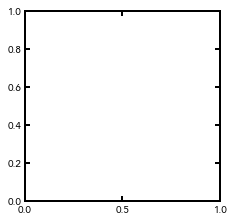

In [6]:
# sacrificial empty plot because the first plot does not properly update params
[fig, axes] = setup_plot()

plt.rcParams.update({"font.size": 18})
plt.rcParams.update({"axes.linewidth": 2})

In [7]:
file_loader = PyHyperScattering.load.cyrsoxsLoader()

scans = []
del scans

scans = cyrsoxs_scan_loader(base_data_dirs)

# save scans to pickle
with open(scan_save_name, 'wb') as file:
    pickle.dump(scans, file, protocol = -1)


RAM usage: 47.77 %
CPU usage: 17.90 %
Currently pulling data from 'C:\Users\Phong\Desktop\CyRSoXS\v4_sims\sims\Reduced_F4TCNQ\C_K_Edge_Reduced_F4TCNQ\Phong_Pickled_Morphologies_v4_C_TFSI_Everywhere\100-400nm\Average_Oriented\1024x1024x512nm_pitch2nm_rad15nm_std3nm_1250fib_100-400nm' (3/3)
Finished reading 54 energies. Time required: 0:00:00.420609


In [8]:
scans = []
del scans

# load scans from pickle
with open(scan_save_name, 'rb') as file:
    scans = pickle.load(file)

print(len(scans))

3


In [9]:
# variables to append sample ID and AR xarrays
edges = []

ARs = []
AR_scales = []

paras = []
para_scales = []

perps = []
perp_scales = []

circs = []
circ_scales = []

FY_NEXAFSs = []

Iq2s = []
ISIs = []

base_data_dirs = []
crystal_mol_frac = []
dopant_mol_frac = []

AR_min = []
AR_max = []

del edges

del ARs
del AR_scales

del paras
del para_scales

del perps
del perp_scales

del circs
del circ_scales

del FY_NEXAFSs

del Iq2s
del ISIs

del base_data_dirs
del crystal_mol_frac
del dopant_mol_frac

del AR_min
del AR_max

edges = []

ARs = []
AR_scales = []

paras = []
para_scales = []

perps = []
perp_scales = []

circs = []
circ_scales = []

FY_NEXAFSs = []

Iq2s = []
ISIs = []

base_data_dirs = []
crystal_mol_frac = []
dopant_mol_frac = []

AR_min = []
AR_max = []

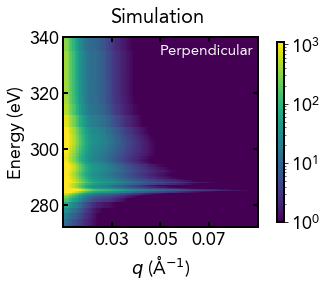

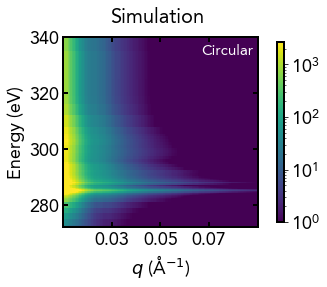

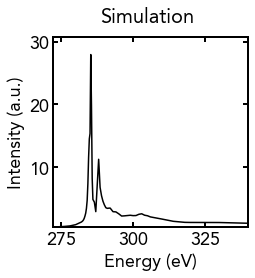

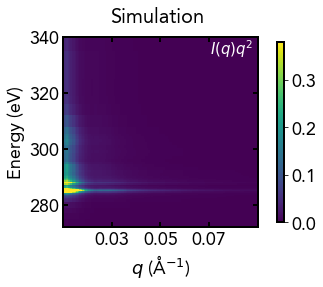

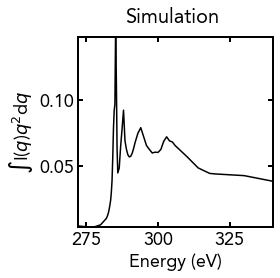

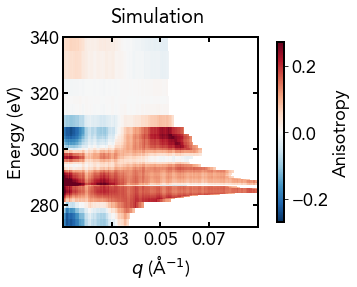

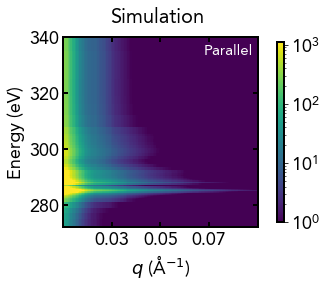

Progress 3/3


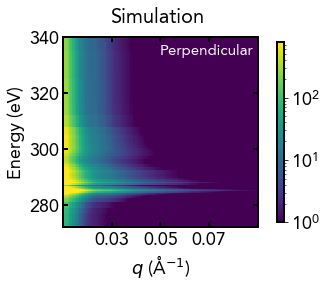

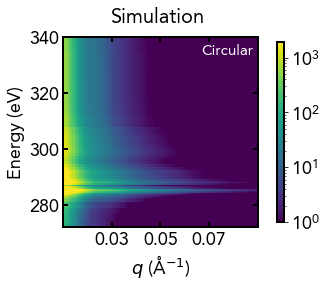

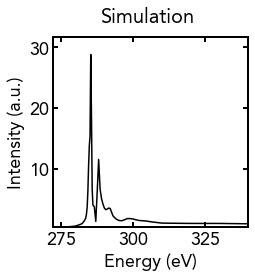

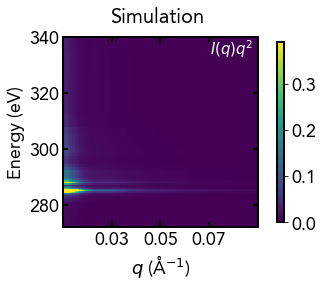

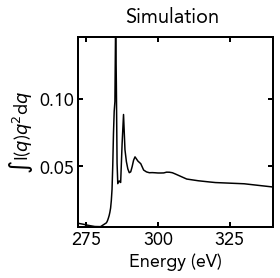

In [10]:
print(f'{len(scans)} scans imported')

integ = PyHyperScattering.integrate.WPIntegrator()

start_en = np.nanmin(scans[0].energy)
end_en = np.nanmax(scans[0].energy)
start_q = 0.01
end_q = 0.09
q_rounding_order = 0.01

for i, scan in enumerate(scans):
    
    # reset energy
    current_energy = 0
    del current_energy
    current_energy = 0
        
    integrated_data = integ.integrateImageStack(scan)
    
    # make sure final processing output directory exists
    reduced_save_dir = make_output_dir(scan.base_data_dir, '0_reduced')   
    
    base_data_dirs.append(scan.base_data_dir)
    
    crystal_mol_frac.append(scan.crystal_mol_frac)
    dopant_mol_frac.append(scan.dopant_mol_frac)
    
    # # Make sure directories exist
    # just_rel_detImage_save_dir = make_output_dir(base_save_dir, 'just_rel_detImage')
    # rel_detImage_save_dir = make_output_dir(base_save_dir, 'rel_detImage')
    # abs_detImage_save_dir = make_output_dir(base_save_dir, 'abs_detImage')

    # Remove old files
    # clear_dir(rel_detImage_save_dir)
    # clear_dir(abs_detImage_save_dir)

    clear_dir(reduced_save_dir)

    ## Make plot of the AR
    para = integrated_data.rsoxs.slice_chi(90, chi_width = 45).sel(q = slice(start_q, end_q))
    perp = integrated_data.rsoxs.slice_chi(0, chi_width = 45).sel(q = slice(start_q, end_q))

    AR = (para - perp)/(para + perp)

    AR_scales.append(np.nanmax([abs(np.nanpercentile(AR.sel(energy = slice(start_en, end_en)), 1)), abs(np.nanpercentile(AR.sel(energy = slice(start_en, end_en)), 99))]))

    # AR_scales = [0.5]

    # log info for mosaic
    ARs.append(AR)
#     AR_max.append(AR.sel(energy = 285.25, q = slice(0.01, 0.1)).mean())
#     AR_min.append(AR.sel(energy = 287, q = slice(0.01, 0.1)).mean())

    [fig, axes] = setup_plot()

    im_cbar = AR.sel(energy = slice(start_en, end_en)).plot(
        x = 'q', y = 'energy',
        ax = axes,
        vmin = -AR_scales[-1],
        vmax = AR_scales[-1],
        cmap = 'RdBu_r',
        add_colorbar = False)

    cbar_ax = fig.add_axes([0.975, 0.145, 0.03, 0.715])
    cbar = fig.colorbar(im_cbar, cax = cbar_ax)

    # plt.setp(cbar.ax.get_yticklabels(), ha = "right")
    # cbar.ax.tick_params(pad = 37.5)
    cbar.ax.set_ylabel('Anisotropy')

    fig.suptitle(f'Simulation', fontsize = 20, y = 1, x = 0.5)
    axes.set_xlabel('$\it{q}$ (Å$^{-1}$)')
    axes.set_ylabel('Energy (eV)')
    axes.set_xlim([start_q, end_q])
    x_ticks = generate_ticks(start_q, end_q, num_ticks=5, rounding_order=q_rounding_order)
    axes.set_xticks(x_ticks)
    x_ticks_strs = [str(value) for value in x_ticks]
    x_ticks_strs[0] = ''
    x_ticks_strs[-1] = ''
    axes.set_xticklabels(x_ticks_strs)
    axes.yaxis.set_major_formatter(ticker.FormatStrFormatter('%.0f'))
    axes.set_ylim([start_en, end_en])

    axes.xaxis.set_tick_params(which = 'major', size = 5, width = 2, direction = 'in', top = 'on')
    axes.xaxis.set_tick_params(which = 'minor', size = 2.5, width = 2, direction = 'in', top = 'on')
    axes.yaxis.set_tick_params(which = 'major', size = 5, width = 2, direction = 'in', right = 'on')
    axes.yaxis.set_tick_params(which = 'minor', size = 2.5, width = 2, direction = 'in', right = 'on')

    clear_output(wait = True)

    # plt.show()

    save_fig(fig, -1, reduced_save_dir, 'AR', 300)


    [fig, axes] = setup_plot()

    im_cbar = para.plot(
        x = 'q', y = 'energy',
        ax = axes,
        norm = LogNorm(1, np.nanpercentile(para, 97.5)),
        # vmin = 0,
        # vmax = np.nanpercentile(para, 97.5),
        cmap = cmap,
        add_colorbar = False)

    paras.append(para)
    para_scales.append(np.nanpercentile(para, 97.5))

    cbar_ax = fig.add_axes([0.975, 0.145, 0.03, 0.715])
    fig.colorbar(im_cbar, cax = cbar_ax)

    fig.suptitle(f'Simulation', fontsize = 20, y = 1, x = 0.5)
    axes.set_title('')
    axes.text(0.975, 0.91, f'Parallel', color = 'white', fontsize = 15, transform = axes.transAxes, horizontalalignment = 'right')

    axes.set_xlabel('$\it{q}$ (Å$^{-1}$)')
    axes.set_ylabel('Energy (eV)')
    axes.set_xlim([start_q, end_q])
    x_ticks = generate_ticks(start_q, end_q, num_ticks=5, rounding_order=q_rounding_order)
    axes.set_xticks(x_ticks)
    x_ticks_strs = [str(value) for value in x_ticks]
    x_ticks_strs[0] = ''
    x_ticks_strs[-1] = ''
    axes.set_xticklabels(x_ticks_strs)
    axes.yaxis.set_major_formatter(ticker.FormatStrFormatter('%.0f'))
    axes.set_ylim([start_en, end_en])

    axes.xaxis.set_tick_params(which = 'major', size = 5, width = 2, direction = 'in', top = 'on')
    axes.xaxis.set_tick_params(which = 'minor', size = 2.5, width = 2, direction = 'in', top = 'on')
    axes.yaxis.set_tick_params(which = 'major', size = 5, width = 2, direction = 'in', right = 'on')
    axes.yaxis.set_tick_params(which = 'minor', size = 2.5, width = 2, direction = 'in', right = 'on')

    plt.show()

    save_fig(fig, -1, reduced_save_dir, 'para', 300)


    [fig, axes] = setup_plot()

    im_cbar = perp.plot(
        x = 'q', y = 'energy',
        ax = axes,
        norm = LogNorm(1, np.nanpercentile(perp, 97.5)),
        # vmin = 0,
        # vmax = np.nanpercentile(perp, 97.5),
        cmap = cmap,
        add_colorbar = False)

    perps.append(perp)
    perp_scales.append(np.nanpercentile(perp, 97.5))

    cbar_ax = fig.add_axes([0.975, 0.145, 0.03, 0.715])
    fig.colorbar(im_cbar, cax = cbar_ax)

    fig.suptitle(f'Simulation', fontsize = 20, y = 1, x = 0.5)
    axes.set_title('')
    axes.text(0.975, 0.91, f'Perpendicular', color = 'white', fontsize = 15, transform = axes.transAxes, horizontalalignment = 'right')

    axes.set_xlabel('$\it{q}$ (Å$^{-1}$)')
    axes.set_ylabel('Energy (eV)')
    axes.set_xlim([start_q, end_q])
    x_ticks = generate_ticks(start_q, end_q, num_ticks=5, rounding_order=q_rounding_order)
    axes.set_xticks(x_ticks)
    x_ticks_strs = [str(value) for value in x_ticks]
    x_ticks_strs[0] = ''
    x_ticks_strs[-1] = ''
    axes.set_xticklabels(x_ticks_strs)
    axes.yaxis.set_major_formatter(ticker.FormatStrFormatter('%.0f'))
    axes.set_ylim([start_en, end_en])

    axes.xaxis.set_tick_params(which = 'major', size = 5, width = 2, direction = 'in', top = 'on')
    axes.xaxis.set_tick_params(which = 'minor', size = 2.5, width = 2, direction = 'in', top = 'on')
    axes.yaxis.set_tick_params(which = 'major', size = 5, width = 2, direction = 'in', right = 'on')
    axes.yaxis.set_tick_params(which = 'minor', size = 2.5, width = 2, direction = 'in', right = 'on')

    # plt.show()

    save_fig(fig, -1, reduced_save_dir, 'perp', 300)


    para_perp = para + perp

    [fig, axes] = setup_plot()

    im_cbar = para_perp.plot(
        x = 'q', y = 'energy',
        ax = axes,
        norm = LogNorm(1, np.nanpercentile(para_perp, 97.5)),
        # vmin = 0,
        # vmax = np.nanpercentile(para_perp, 97.5),
        cmap = cmap,
        add_colorbar = False)

    circs.append(para_perp)
    circ_scales.append(np.nanpercentile(para_perp, 97.5))

    cbar_ax = fig.add_axes([0.975, 0.145, 0.03, 0.715])
    fig.colorbar(im_cbar, cax = cbar_ax)

    fig.suptitle(f'Simulation', fontsize = 20, y = 1, x = 0.5)
    axes.set_title('')
    axes.text(0.975, 0.91, f'Circular', color = 'white', fontsize = 15, transform = axes.transAxes, horizontalalignment = 'right')

    axes.set_xlabel('$\it{q}$ (Å$^{-1}$)')
    axes.set_ylabel('Energy (eV)')
    axes.set_xlim([start_q, end_q])
    x_ticks = generate_ticks(start_q, end_q, num_ticks=5, rounding_order=q_rounding_order)
    axes.set_xticks(x_ticks)
    x_ticks_strs = [str(value) for value in x_ticks]
    x_ticks_strs[0] = ''
    x_ticks_strs[-1] = ''
    axes.set_xticklabels(x_ticks_strs)
    axes.yaxis.set_major_formatter(ticker.FormatStrFormatter('%.0f'))
    axes.set_ylim([start_en, end_en])

    axes.xaxis.set_tick_params(which = 'major', size = 5, width = 2, direction = 'in', top = 'on')
    axes.xaxis.set_tick_params(which = 'minor', size = 2.5, width = 2, direction = 'in', top = 'on')
    axes.yaxis.set_tick_params(which = 'major', size = 5, width = 2, direction = 'in', right = 'on')
    axes.yaxis.set_tick_params(which = 'minor', size = 2.5, width = 2, direction = 'in', right = 'on')

    # plt.show()

    save_fig(fig, -1, reduced_save_dir, 'circ', 300)



    [fig, axes] = setup_plot()

    FY_NEXAFS = integrated_data.mean('chi').sel(q = slice(0.03, 0.075), energy = slice(start_en, end_en)).mean('q')

    FY_NEXAFSs.append(FY_NEXAFS)

    FY_NEXAFS.plot(
        ax = axes,
        color = 'k')

    fig.suptitle(f'Simulation', fontsize = 20, y = 1, x = 0.5)
    axes.set_ylabel('Intensity (a.u.)')
    axes.set_xlabel('Energy (eV)')
    axes.set_xlim([start_en, end_en])
    axes.set_ylim([0.9*np.nanmin(FY_NEXAFS), 
                   1.1*np.nanmax(FY_NEXAFS)])

    # plt.show()

    save_fig(fig, -1, reduced_save_dir, 'FY_NEXAFS', 300)

    
    Iq2 = integrated_data.mean('chi', skipna=True).copy(deep=True)

    for q_val in integrated_data.q:
        Iq2.loc[dict(q = q_val)] = Iq2.sel(q = q_val)*(q_val**2)

    [fig, axes] = setup_plot()

    im_cbar = Iq2.plot(
        x = 'q', y = 'energy',
        ax = axes,
        vmin = 0,
        vmax = np.nanpercentile(Iq2, 97.5),
        cmap = cmap,
        add_colorbar = False)

    Iq2s.append(Iq2)

    cbar_ax = fig.add_axes([0.975, 0.145, 0.03, 0.715])
    fig.colorbar(im_cbar, cax = cbar_ax)

    fig.suptitle(f'Simulation', fontsize = 20, y = 1, x = 0.5)
    axes.set_title('')
    axes.text(0.975, 0.91, f'$I(q) q^{2}$', color = 'white', fontsize = 15, transform = axes.transAxes, horizontalalignment = 'right')


    axes.set_xlabel('$\it{q}$ (Å$^{-1}$)')
    axes.set_ylabel('Energy (eV)')
    axes.set_xlim([start_q, end_q])
    x_ticks = generate_ticks(start_q, end_q, num_ticks=5, rounding_order=q_rounding_order)
    axes.set_xticks(x_ticks)
    x_ticks_strs = [str(value) for value in x_ticks]
    x_ticks_strs[0] = ''
    x_ticks_strs[-1] = ''
    axes.set_xticklabels(x_ticks_strs)
    axes.yaxis.set_major_formatter(ticker.FormatStrFormatter('%.0f'))
    axes.set_ylim([start_en, end_en])

    axes.xaxis.set_tick_params(which = 'major', size = 5, width = 2, direction = 'in', top = 'on')
    axes.xaxis.set_tick_params(which = 'minor', size = 2.5, width = 2, direction = 'in', top = 'on')
    axes.yaxis.set_tick_params(which = 'major', size = 5, width = 2, direction = 'in', right = 'on')
    axes.yaxis.set_tick_params(which = 'minor', size = 2.5, width = 2, direction = 'in', right = 'on')
    axes.xaxis.set_tick_params(which = 'major', size = 5, width = 2, direction = 'in', top = 'on')
    axes.xaxis.set_tick_params(which = 'minor', size = 2.5, width = 2, direction = 'in', top = 'on')
    axes.yaxis.set_tick_params(which = 'major', size = 5, width = 2, direction = 'in', right = 'on')
    axes.yaxis.set_tick_params(which = 'minor', size = 2.5, width = 2, direction = 'in', right = 'on')

    # plt.show()

    save_fig(fig, -1, reduced_save_dir, 'Iq2', 150)
        

    [fig, axes] = setup_plot()

    ISI = Iq2.sel(q = slice(np.nanmin(Iq2.q), np.nanmax(Iq2.q)), energy = slice(start_en, end_en)).mean('q', skipna=True)

    ISIs.append(ISI)

    ISI.plot(
        ax = axes,
        color = 'k')

    fig.suptitle(f'Simulation', fontsize = 20, y = 1, x = 0.5)
    axes.set_ylabel('∫I($\it{q}$)$\it{q}$$^{2}$d$\it{q}$')
    axes.set_xlabel('Energy (eV)')
    axes.set_xlim([start_en, end_en])
    axes.set_ylim([0.9*np.nanpercentile(ISI, 1), 
                   1.1*np.nanpercentile(ISI, 99)])

    # plt.show()

    save_fig(fig, -1, reduced_save_dir, 'ISI', 150)








    # # variables to hist energy-dependent contrasts and plot limits
    # current_vmax_detImage = []
    # current_linecuts_ylim_min = []
    # current_linecuts_ylim_max = []

    # del current_vmax_detImage
    # del current_linecuts_ylim_min
    # del current_linecuts_ylim_max

    # current_vmax_detImage = []
    # current_linecuts_ylim_min = []
    # current_linecuts_ylim_max = []

    # ### Loop for iterating through energies
    # for current_energy in np.sort(integrated_data.sel(energy = slice(start_en, end_en)).energy):

    #     ## Make plots of detector image            
    #     fig, axes = plt.subplots(1, 2, figsize = (6.75, 3.5))

    #     detector_im = scan.sel(energy=current_energy, qx = slice(-0.1, 0.1), qy = slice(-0.1, 0.1))

    #     current_vmax_detImage.append(np.nanpercentile(detector_im, 95))

    # #     det_im = detector_im.plot(
    # #         x = 'qx', y = 'qy',
    # #         ax = axes[0],
    # #         norm = LogNorm(np.nanpercentile(detector_im, 1), np.nanpercentile(detector_im, 99)),
    # #         # vmin = np.nanpercentile(detector_im, 1),
    # #         # vmax = np.nanpercentile(detector_im, 99),
    # #         cmap = cmap,
    # #         add_colorbar = False)

    # #     axes[0].set_xlabel('$\it{q}_x$ (Å$^{-1}$)')
    # #     axes[0].set_ylabel('$\it{q}_y$ (Å$^{-1}$)')
    # #     axes[0].set_xticks([-0.1, -0.07, 0.00, 0.07, 0.1])
    # #     axes[0].set_yticks([-0.1, -0.07, 0.00, 0.07, 0.1])
    # #     axes[0].set_xlim([np.nanmin(detector_im.qx), np.nanmax(detector_im.qx)])
    # #     axes[0].set_ylim([np.nanmin(detector_im.qy), np.nanmax(detector_im.qy)])

    #     det_im = axes[0].imshow(detector_im,
    # #                     norm = LogNorm(1, np.nanpercentile(detector_im, 99)),
    #                     vmin = 0,
    #                     vmax = current_vmax_detImage[-1],
    #                     cmap = cmap,
    #                     aspect = 1)

    #     axes[0].set_xticks([])
    #     axes[0].set_yticks([])

    #     cake = integrated_data.sel(energy = current_energy, q = slice(0.015, end_q))

    #     im = cake.plot(
    #         x = 'chi', y = 'q',
    #         ax = axes[1],
    # #         norm = LogNorm(1, np.nanpercentile(cake, 99)),
    #         vmin = 0,
    #         vmax = current_vmax_detImage[-1],
    #         cmap = cmap,
    #         add_colorbar = False)

    #     axes[1].set_ylabel('$\it{q}$ (Å$^{-1}$)')
    #     axes[1].set_xlabel('Azimuth, $\it{χ}$')
    #     axes[1].set_yticks([0.01, 0.03, 0.05, 0.07, 0.09])
    #     axes[1].set_ylim([start_q, end_q])
    #     axes[1].set_xticks([-180, -90, 0, 90, 180], ['', '-90°', '0°', '90°', ''])
    #     # axes[1].set_xticks([-180, -90, 0, 90, 180], ['-π', '', '0', '', 'π'])

    #     axes[1].xaxis.set_tick_params(which = 'major', size = 5, width = 2, direction = 'in', top = 'on')
    #     axes[1].xaxis.set_tick_params(which = 'minor', size = 2.5, width = 2, direction = 'in', top = 'on')
    #     axes[1].yaxis.set_tick_params(which = 'major', size = 5, width = 2, direction = 'inout', right = 'on')
    #     axes[1].yaxis.set_tick_params(which = 'minor', size = 2.5, width = 2, direction = 'inout', right = 'on')

    #     cbar_ax = fig.add_axes([0.975, 0.31, 0.02, 0.45])
    #     cbar = fig.colorbar(im, cax=cbar_ax)
    #     # cbar.ax.set_ylabel('Intensity (a.u.)')

    #     fig.suptitle(f'Simulation', fontsize = 17.5, y = 0.95, x = 0.55)
    #     axes[0].set_title('')
    #     axes[1].set_title('')

    #     axes[0].text(0.975, 0.875, f'{current_energy:.2f} eV, 0°', color = 'white', fontsize = 15, transform = axes[0].transAxes, horizontalalignment = 'right')
    #     axes[1].text(0.975, 0.875, f'{current_energy:.2f} eV, 0°', color = 'white', fontsize = 15, transform = axes[1].transAxes, horizontalalignment = 'right')

    #     plt.tight_layout()

    #     clear_output(wait = True)

    #     # plt.show()

    #     save_fig(fig, current_energy, rel_detImage_save_dir, 'detImage', 300)





    #     ## Make plots of just the detector image            
    #     fig, axes = plt.subplots(1, 1, figsize = (3.5, 3.5))

    #     detector_im = scan.sel(energy=current_energy, qx = slice(-0.1, 0.1), qy = slice(-0.1, 0.1))

    #     current_vmax_detImage.append(np.nanpercentile(detector_im, 95))



    #     det_im = axes.imshow(detector_im,
    # #                     norm = LogNorm(1, np.nanpercentile(detector_im, 99)),
    #                     vmin = 0,
    #                     vmax = current_vmax_detImage[-1],
    #                     cmap = cmap,
    #                     aspect = 1)

    #     axes.set_xticks([])
    #     axes.set_yticks([])

    #     plt.tight_layout()

    #     clear_output(wait = True)

    #     # plt.show()

    #     save_fig(fig, current_energy, just_rel_detImage_save_dir, 'just_detImage', 300)





    #     [fig, axes] = plt.subplots(2, 2, figsize = (7, 7))
    #     fig.suptitle(f'Simulation', fontsize = 20, y = 0.975, x = 0.5)
    #     axes[1, 1].axis('off')

    #     para = integrated_data.rsoxs.slice_chi(0, chi_width = 45).sel(energy = current_energy, q = slice(start_q, end_q))
    #     perp = integrated_data.rsoxs.slice_chi(90, chi_width = 45).sel(energy = current_energy, q = slice(start_q, end_q))

    #     axes[0, 0].plot(para.q, para, '-', color = (57/255, 115/255, 180/255), label = 'Parallel')

    #     axes[0, 0].plot(perp.q, perp, '-', color = (170/255, 21/255, 40/255), label = 'Perpendicular')

    #     axes[0, 0].legend(loc = 'upper right', frameon = False, fontsize = 15)

    #     axes[0, 0].set_title('')
    #     axes[0, 0].text(0.395, 0.6, f'{current_energy:.0f} eV', color = 'white', fontsize = 15, transform = axes[0, 0].transAxes, horizontalalignment = 'left')

    #     axes[0, 0].set_ylabel('Intensity (a.u.)')
    #     axes[0, 0].set_xlabel('')
    #     axes[0, 0].set_xlim([start_q, end_q])
    #     axes[0, 0].set_ylim([np.nanmin([np.nanpercentile(para, 1), np.nanpercentile(perp, 1)]),
    #              np.power(np.nanmax([np.nanpercentile(para, 99.9), np.nanpercentile(perp, 99.9)]), 1.25)])
    #     axes[0, 0].set_yticklabels([])
    #     axes[0, 0].set_xticklabels([])
    #     axes[0, 0].set_xticks([0.01, 0.03, 0.05, 0.07, 0.09])

    #     axes[0, 0].yaxis.set_major_formatter(ticker.FuncFormatter(fmt))
    #     axes[0, 0].set_yscale('log')

    #     axes[0, 0].xaxis.set_tick_params(which = 'major', size = 5, width = 2, direction = 'inout', top = 'on')
    #     axes[0, 0].xaxis.set_tick_params(which = 'minor', size = 2.5, width = 2, direction = 'inout', top = 'on')
    #     axes[0, 0].yaxis.set_tick_params(which = 'major', size = 5, width = 2, direction = 'in', right = 'on')
    #     axes[0, 0].yaxis.set_tick_params(which = 'minor', size = 2.5, width = 2, direction = 'in', right = 'on')

    #     current_linecuts_ylim_min.append(np.nanmin(axes[0, 0].get_ylim()))
    #     current_linecuts_ylim_max.append(np.nanmax(axes[0, 0].get_ylim()))


    #     FY_NEXAFS.plot(
    #         ax = axes[0, 1],
    #         color = 'k',
    #         alpha = 0.2)

    #     if current_energy > start_en:
    #         integrated_data.mean('chi').sel(q = slice(0.055, 0.075), energy = slice(start_en, current_energy)).mean('q').plot(
    #             ax = axes[0, 1],
    #             color = 'k',
    #             alpha = 1)

    #     axes[0, 1].plot(current_energy, integrated_data.mean('chi').sel(q = slice(0.055, 0.075)).mean('q').sel(energy = current_energy), 'o', color = 'black')

    #     axes[0, 1].set_title('Fluorescence NEXAFS', color = 'white', fontsize = 18)
    #     # axes[0, 1].text(0.975, 0.05, f'FY NEXAFS', color = 'white', fontsize = 15, transform = axes[0, 1].transAxes, horizontalalignment = 'right')

    #     # axes[0, 1].set_ylabel('Intensity (a.u.)')
    #     axes[0, 1].set_xlabel('Energy (eV)')
    #     axes[0, 1].set_xlim([start_en, end_en])
    #     axes[0, 1].set_ylim([0.9*np.nanpercentile(FY_NEXAFS, 1), 
    #                    1.1*np.nanpercentile(FY_NEXAFS, 99)])
    #     axes[0, 1].set_yticklabels([])
    #     # axes[0, 1].set_yscale('log')

    #     axes[0, 1].xaxis.set_tick_params(which = 'major', size = 5, width = 2, direction = 'in', top = 'on')
    #     axes[0, 1].xaxis.set_tick_params(which = 'minor', size = 2.5, width = 2, direction = 'in', top = 'on')
    #     axes[0, 1].yaxis.set_tick_params(which = 'major', size = 5, width = 2, direction = 'in', right = 'on')
    #     axes[0, 1].yaxis.set_tick_params(which = 'minor', size = 2.5, width = 2, direction = 'in', right = 'on')

    #     para = integrated_data.rsoxs.slice_chi(0, chi_width = 45).sel(energy = slice(start_en, current_energy), q = slice(start_q, end_q,))
    #     perp = integrated_data.rsoxs.slice_chi(90, chi_width = 45).sel(energy = slice(start_en, current_energy), q = slice(start_q, end_q))

    #     AR = (para - perp)/(para + perp)

    #     if len(AR.energy) < 2:
    #         para = integrated_data.rsoxs.slice_chi(0, chi_width = 45).sel(energy = slice(start_en, end_en), q = slice(start_q, end_q))
    #         perp = integrated_data.rsoxs.slice_chi(90, chi_width = 45).sel(energy = slice(start_en, end_en), q = slice(start_q, end_q))

    #         AR1 = (para - perp)/(para + perp)

    #         scale = np.nanmax([abs(np.nanpercentile(AR1.sel(energy = slice(start_en, end_en)), 1)), abs(np.nanpercentile(AR1.sel(energy = slice(start_en, end_en)), 99))])

    #         im_cbar = AR1.plot(
    #             x = 'q', y = 'energy',
    #             ax = axes[1, 0],
    #             vmin = -scale,
    #             vmax = scale,
    #             cmap = 'RdBu',
    #             add_colorbar = False)

    #         cbar_ax = fig.add_axes([0.5, 0.14, 0.02, 0.31])
    #         cbar = fig.colorbar(im_cbar, cax = cbar_ax)

    #         # plt.setp(cbar.ax.get_yticklabels(), ha = "right")
    #         # cbar.ax.tick_params(pad = 50)
    #         # cbar.ax.set_ylabel('Anisotropy')

    #         axes[1, 0].set_title('')
    #         # axes[1].text(0.975, 0.05, f'AR', color = 'white', fontsize = 15, transform = axes[1].transAxes, horizontalalignment = 'right')

    #         axes[1, 0].set_xlabel('$\it{q}$ (Å$^{-1}$)')
    #         axes[1, 0].set_ylabel('Energy (eV)')
    #         axes[1, 0].set_xlim([start_q, end_q])
    #         axes[1, 0].set_xticks([0.01, 0.03, 0.05, 0.07, 0.09], ['', '0.03', '0.05', '0.07', '0.09'])
    #         axes[1, 0].set_ylim([AR1.energy[0], (AR1.energy[1] - AR1.energy[0])/2 + AR1.energy[0]])
    #         # axes[1, 0].set_ylim([np.nanmin(AR1.energy), np.nanmax(AR1.energy)])
    #         axes[1, 0].yaxis.set_major_formatter(ticker.FormatStrFormatter('%.0f'))

    #         # ticks = [tick for tick in axes[1].get_yticks()]
    #         # del ticks[-1]
    #         # axes[1].set_yticks(ticks)

    #         axes[1, 0].xaxis.set_tick_params(which = 'major', size = 5, width = 2, direction = 'inout', top = 'on')
    #         axes[1, 0].xaxis.set_tick_params(which = 'minor', size = 2.5, width = 2, direction = 'inout', top = 'on')
    #         axes[1, 0].yaxis.set_tick_params(which = 'major', size = 5, width = 2, direction = 'in', right = 'on')
    #         axes[1, 0].yaxis.set_tick_params(which = 'minor', size = 2.5, width = 2, direction = 'in', right = 'on')

    #     else:

    #         AR1.plot(
    #             x = 'q', y = 'energy',
    #             ax = axes[1, 0],
    #             vmin = -scale,
    #             vmax = scale,
    #             cmap = 'RdBu',
    #             add_colorbar = False,
    #             alpha = 0.2)

    #         im_cbar = AR.plot(
    #             x = 'q', y = 'energy',
    #             ax = axes[1, 0],
    #             vmin = -scale,
    #             vmax = scale,
    #             cmap = 'RdBu',
    #             add_colorbar = False)

    #         cbar_ax = fig.add_axes([0.5, 0.14, 0.02, 0.31])
    #         cbar = fig.colorbar(im_cbar, cax = cbar_ax)

    #         # plt.setp(cbar.ax.get_yticklabels(), ha = "right")
    #         # cbar.ax.tick_params(pad = 50)


    #         axes[1, 0].set_title('')
    #         # axes[1, 0].text(0.975, 0.05, f'AR', color = 'white', fontsize = 15, transform = axes[1].transAxes, horizontalalignment = 'right')

    #         axes[1, 0].set_xlabel('$\it{q}$ (Å$^{-1}$)')
    #         axes[1, 0].set_ylabel('Energy (eV)')
    #         axes[1, 0].set_xlim([start_q, end_q])
    #         axes[1, 0].set_xticks([0.01, 0.03, 0.05, 0.07, 0.09], ['', '0.03', '0.05', '0.07', '0.09'])

    #         # ticks = [tick for tick in axes[1, 0].get_yticks()]
    #         # del ticks[-1]
    #         # axes[1, 0].set_yticks(ticks)
    #         axes[1, 0].set_ylim([np.nanmin(AR.energy), np.nanmax(AR.energy)])
    #         axes[1, 0].yaxis.set_major_formatter(ticker.FormatStrFormatter('%.0f'))

    #         axes[1, 0].xaxis.set_tick_params(which = 'major', size = 5, width = 2, direction = 'inout', top = 'on')
    #         axes[1, 0].xaxis.set_tick_params(which = 'minor', size = 2.5, width = 2, direction = 'inout', top = 'on')
    #         axes[1, 0].yaxis.set_tick_params(which = 'major', size = 5, width = 2, direction = 'in', right = 'on')
    #         axes[1, 0].yaxis.set_tick_params(which = 'minor', size = 2.5, width = 2, direction = 'in', right = 'on')

    #     # plt.tight_layout()

    #     # plt.show()

    #     save_fig(fig, current_energy, rel_linecuts_save_dir, 'linecuts', 300)

    # clear_output(wait = True)    

    # print('Making gif of rel detector images')    
    # make_gif(rel_detImage_save_dir, reduced_save_dir, 'rel_detImage')

    # print('Making gif of rel linecuts images')    
    # make_gif(rel_linecuts_save_dir, reduced_save_dir, 'rel_linecuts')

    # print('rel gifs done, purging temporary images')  
    # # shutil.rmtree(rel_detImage_save_dir)
    # # shutil.rmtree(rel_linecuts_save_dir)
    
    # save variables to pickle
    with open(pickle_save_name, 'wb') as file:
        pickle.dump([edges, ARs, paras, perps, circs, FY_NEXAFSs, Iq2s, ISIs, base_data_dirs, crystal_mol_frac, dopant_mol_frac, AR_min, AR_max], file, protocol = -1)
        
    print(f'Progress {i + 1}/{len(scans)}')

In [11]:
with open(pickle_save_name, 'rb') as file:
    data = pickle.load(file)

data_dict = {}
del data_dict
data_dict = {'edges': data[0], 'ARs': data[1], 'paras': data[2], 'perps': data[3], 'circs': data[4], 'FY_NEXAFSs': data[5], 'Iq2s': data[6], 'ISIs': data[7], 'base_data_dirs': data[8], 'crystal_mol_frac': data[9], 'dopant_mol_frac': data[10], 'AR_min': data[11], 'AR_max': data[12]}

In [234]:
def plot_AR(dicts, scales, start_en, end_en, en_rounding_order, start_q, end_q, q_rounding_order):
    plt.rcParams['font.size'] = 20
    plt.rcParams['axes.linewidth'] = 2
    
    cmap = mpl.cm.RdBu_r
    cmap.set_bad((246/255, 246/255, 246/255), 1)
    
    fig, axes = plt.subplots(4, 4, figsize=(3.5*4, 3.2*4))
    
    x_ticks = generate_ticks(start_q, end_q, num_ticks=4, rounding_order=q_rounding_order)
    y_ticks = generate_ticks(start_en, end_en, num_ticks=5, rounding_order=en_rounding_order)
    
    highlight_borders = {
        (1, 0): 4, 
        (3, 3): 4, 
    }

    for j in range(4):
        for i in range(4):
            idx = j*4+i
            if idx < len(dicts['ARs']):
                ax = axes[j, i]
                im = dicts['ARs'][idx].sel(energy=slice(start_en, end_en), q=slice(start_q, end_q)).plot(
                    x='q', y='energy', ax=ax, vmin=-np.nanmax(scales), vmax=np.nanmax(scales),
                    cmap=cmap, add_colorbar=False
                )

#                 ax.text(0.035, 0.875, dicts['crystal_mol_frac'][idx], color='black', fontsize=18,
#                         transform=ax.transAxes, horizontalalignment='left',
#                         bbox=dict(facecolor='white', edgecolor='white', alpha=0.75))

                ax.set_xticklabels('')
                ax.set_yticklabels('')
                ax.set_xlabel('')
                ax.set_ylabel('')
                ax.set_xticks(x_ticks)
                ax.set_yticks(y_ticks)
                ax.set_xlim([start_q, end_q])
                ax.set_ylim([start_en, end_en])
                ax.xaxis.set_tick_params(which='both', size=5, width=2, direction='inout', top='on')
                ax.yaxis.set_tick_params(which='both', size=5, width=2, direction='inout', right='on')
            else:
                ax = axes[j, i]

#                 ax.text(0.035, 0.875, dicts['crystal_mol_frac'][idx], color='black', fontsize=18,
#                         transform=ax.transAxes, horizontalalignment='left',
#                         bbox=dict(facecolor='white', edgecolor='white', alpha=0.75))
                ax.set_xticklabels('')
                ax.set_yticklabels('')
                ax.set_xlabel('')
                ax.set_ylabel('')
                ax.set_xticks(x_ticks)
                ax.set_yticks(y_ticks)
                ax.set_xlim([start_q, end_q])
                ax.set_ylim([start_en, end_en])
                ax.xaxis.set_tick_params(which='both', size=5, width=2, direction='inout', top='on')
                ax.yaxis.set_tick_params(which='both', size=5, width=2, direction='inout', right='on')
            
#             # Check if this subplot should have a highlighted border
#             if (i, j) in highlight_borders:
#                 for spine in ax.spines.values():
#                     spine.set_linewidth(highlight_borders[(i, j)])

    # format title and labels
    top_labels = ['Undoped', 'Uniform\nDoping', 'Amorphous\nDoping', 'Crystallite\nDoping']
    for i, label in enumerate(top_labels):
        ax = axes[0, i]
        ax.text(0.5, 1.3, label, color='black', fontsize=22, transform=ax.transAxes,
                horizontalalignment='center', verticalalignment='center')
        ax = axes[-1, i]
        ax.set_xlabel('$\it{q}$ (Å$^{-1}$)', fontsize=20)
        x_ticks_strs = [str(value) for value in x_ticks]
        x_ticks_strs[0] = ''
        x_ticks_strs[-1] = ''
        ax.set_xticklabels(x_ticks_strs)

    for i, label in enumerate(['TFSI$^{-}$\n(Isotropic)', 'F$_{4}$TCNQ$^{•-}$\n(Isotropic)',
                  'F$_{4}$TCNQ$^{•-}$\n(Aligned)', 'F$_{4}$TCNQ$^{•-}$\n(Antialigned)']):
        ax = axes[i, 0]
        ax.set_ylabel('Energy (eV)', fontsize=20)
        y_ticks_strs = [str(value) for value in y_ticks]
        y_ticks_strs[0] = ''
        y_ticks_strs[-1] = ''
        ax.set_yticklabels(y_ticks_strs)
        ax.text(-0.875, 0.5, label, color='black', fontsize=22, transform=ax.transAxes,
                horizontalalignment='center', verticalalignment='center')

#     fig.suptitle(f'{current_edge} edge', fontsize=25, y=1, x=0.5)
    plt.tight_layout()

    # format colorbar
    cbar_ax = fig.add_axes([1, 0.09, 0.0125, 0.81])
    cbar = fig.colorbar(im, cax=cbar_ax, format=FuncFormatter(fmt_AR))
    cbar.ax.set_ylabel('Anisotropy')

    plt.show()

    return fig, axes

In [163]:
pickle_save_name = 'PyHyperScattering_Batch_CyRSoXS_C_Kedge_F4TCNQ.pkl'
scan_save_name = 'CyRSoXS_Scans_C_Kedge_F4TCNQ.pkl'

with open(pickle_save_name, 'rb') as file:
    data = pickle.load(file)

data_dict = {}
del data_dict
data_dict = {'edges': data[0], 'ARs': data[1], 'paras': data[2], 'perps': data[3], 'circs': data[4], 'FY_NEXAFSs': data[5], 'Iq2s': data[6], 'ISIs': data[7], 'base_data_dirs': data[8], 'crystal_mol_frac': data[9], 'dopant_mol_frac': data[10], 'AR_min': data[11], 'AR_max': data[12]}

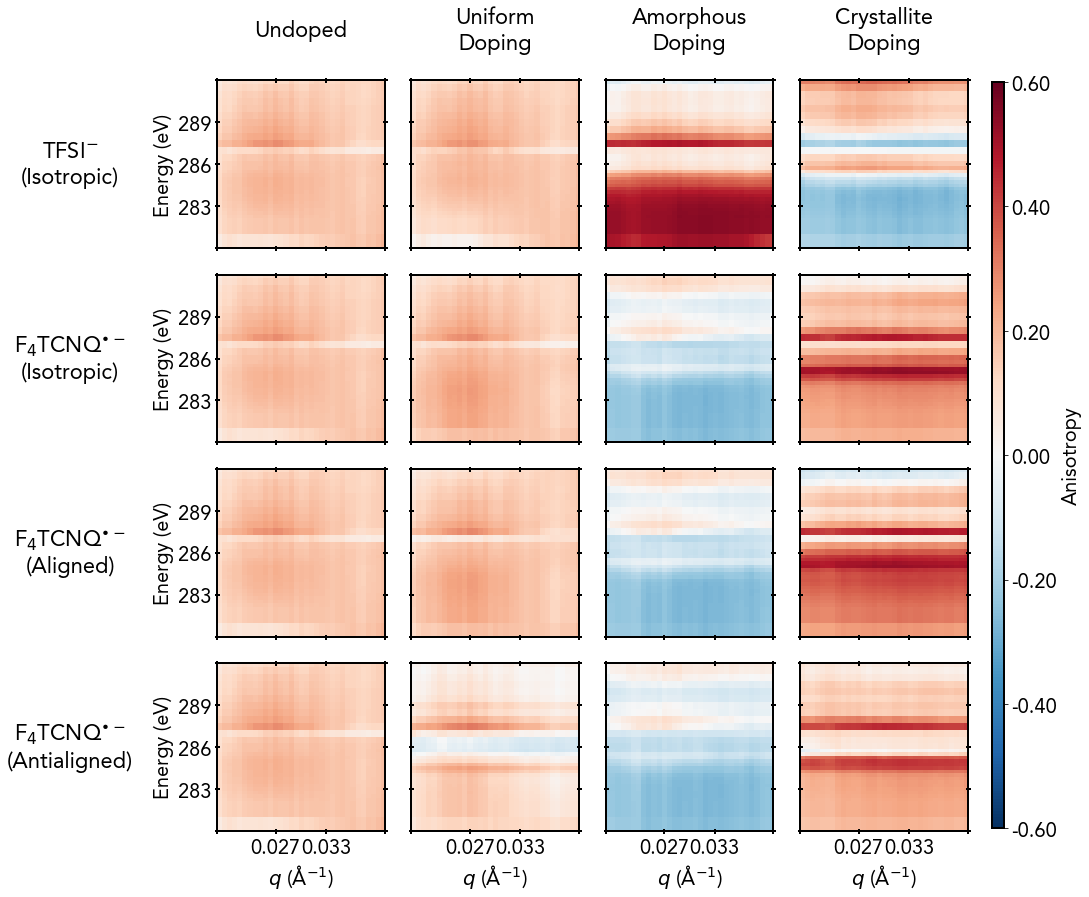

In [164]:
# Pick an edge of the data to work with
current_edge = 'C 1s'

start_en, end_en, en_rounding_order, start_q, end_q, q_rounding_order = 280, 292, 1, 0.02, 0.04, 0.001

scales = [0.6]

[fig, axes] = plot_AR(data_dict, scales, start_en, end_en, en_rounding_order, start_q, end_q, q_rounding_order)

save_fig(fig, -1, r'C:\Users\Phong\Desktop\CyRSoXS', 'CyRSoXS_C1s_F4TCNQ', 300)

In [165]:
pickle_save_name = 'PyHyperScattering_Batch_CyRSoXS_N_Kedge_F4TCNQ.pkl'
scan_save_name = 'CyRSoXS_Scans_N_Kedge_F4TCNQ.pkl'

with open(pickle_save_name, 'rb') as file:
    data = pickle.load(file)

data_dict = {}
del data_dict
data_dict = {'edges': data[0], 'ARs': data[1], 'paras': data[2], 'perps': data[3], 'circs': data[4], 'FY_NEXAFSs': data[5], 'Iq2s': data[6], 'ISIs': data[7], 'base_data_dirs': data[8], 'crystal_mol_frac': data[9], 'dopant_mol_frac': data[10], 'AR_min': data[11], 'AR_max': data[12]}

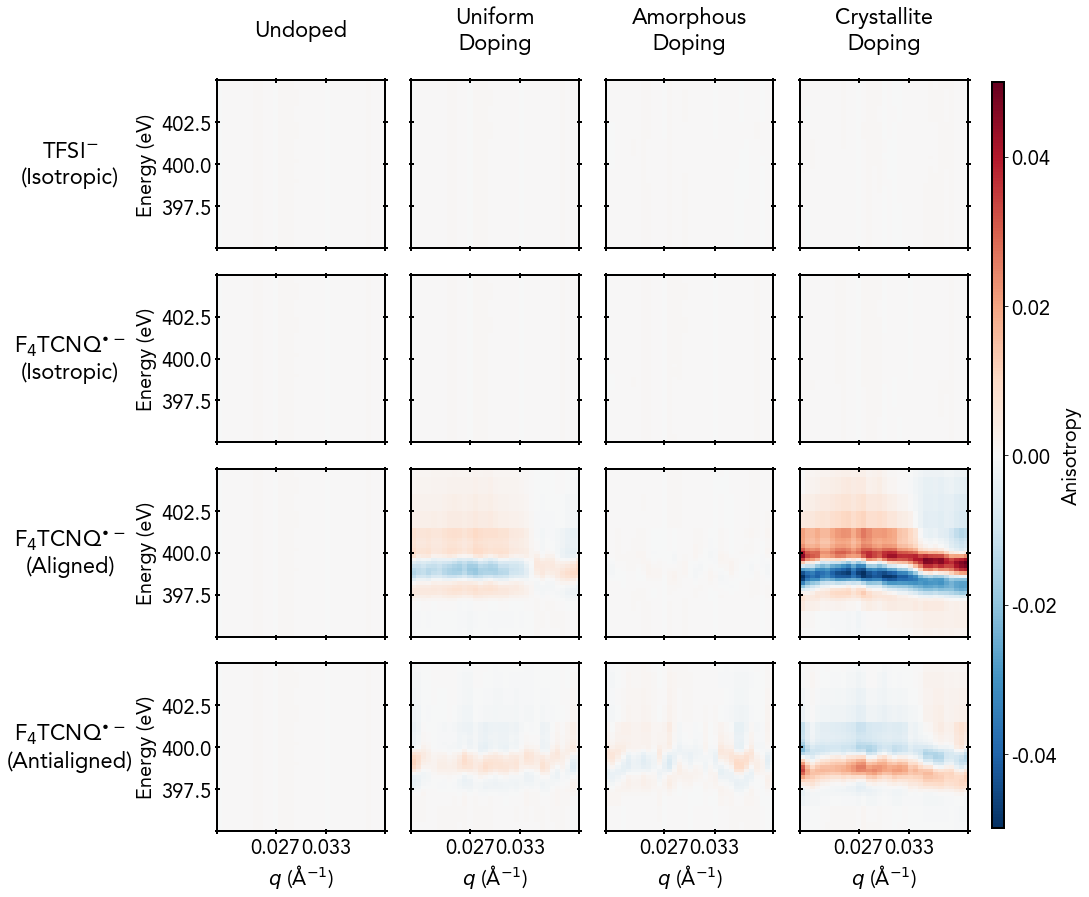

In [166]:
# Pick an edge of the data to work with
current_edge = 'N 1s'

start_en, end_en, en_rounding_order, start_q, end_q, q_rounding_order = 395, 405, 0.1, 0.02, 0.04, 0.001

scales = [0.05]

[fig, axes] = plot_AR(data_dict, scales, start_en, end_en, en_rounding_order, start_q, end_q, q_rounding_order)

save_fig(fig, -1, r'C:\Users\Phong\Desktop\CyRSoXS', 'CyRSoXS_N1s_F4TCNQ', 300)

In [167]:
pickle_save_name = 'PyHyperScattering_Batch_CyRSoXS_F_Kedge_F4TCNQ.pkl'
scan_save_name = 'CyRSoXS_Scans_F_Kedge_F4TCNQ.pkl'

with open(pickle_save_name, 'rb') as file:
    data = pickle.load(file)

data_dict = {}
del data_dict
data_dict = {'edges': data[0], 'ARs': data[1], 'paras': data[2], 'perps': data[3], 'circs': data[4], 'FY_NEXAFSs': data[5], 'Iq2s': data[6], 'ISIs': data[7], 'base_data_dirs': data[8], 'crystal_mol_frac': data[9], 'dopant_mol_frac': data[10], 'AR_min': data[11], 'AR_max': data[12]}

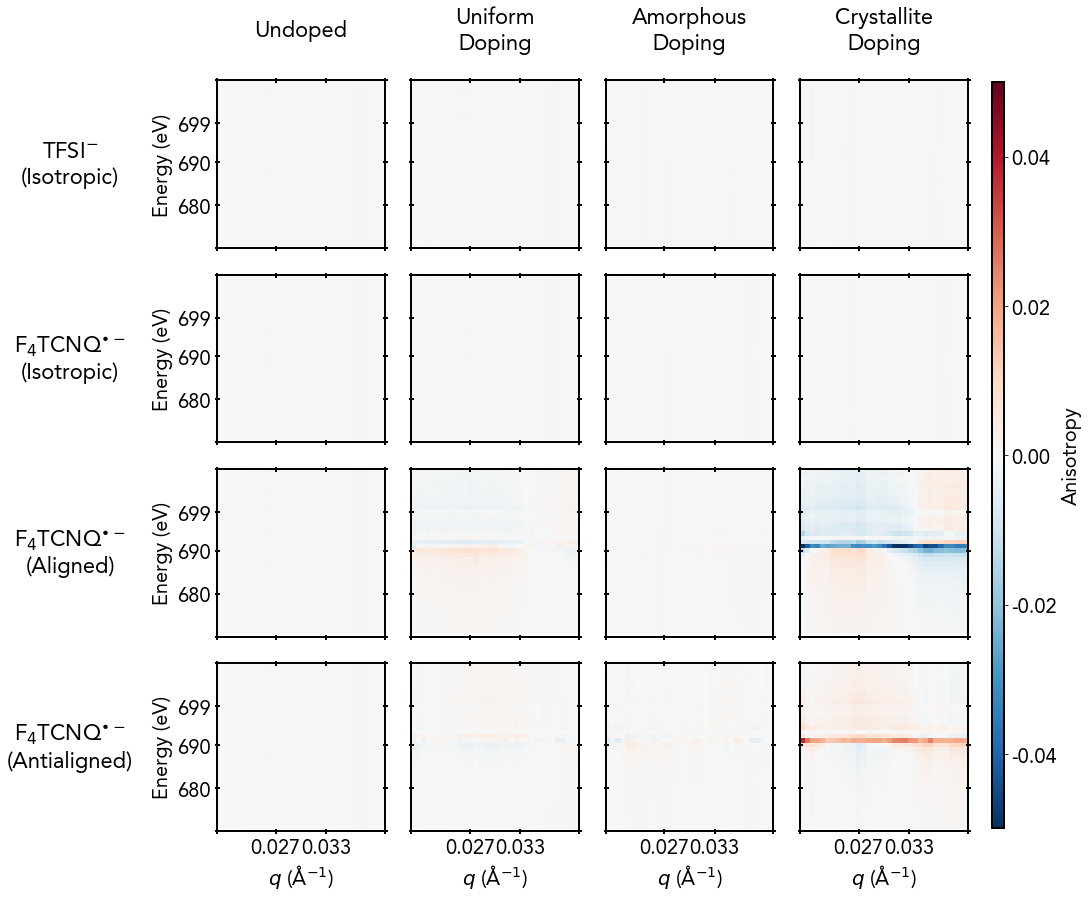

In [168]:
# Pick an edge of the data to work with
current_edge = 'F 1s'

start_en, end_en, en_rounding_order, start_q, end_q, q_rounding_order = 670, 709, 1, 0.02, 0.04, 0.001

scales = [0.05]

[fig, axes] = plot_AR(data_dict, scales, start_en, end_en, en_rounding_order, start_q, end_q, q_rounding_order)

save_fig(fig, -1, r'C:\Users\Phong\Desktop\CyRSoXS', 'CyRSoXS_F1s_F4TCNQ', 300)

In [ ]:
plt.rcParams['font.size'] = 20
plt.rcParams['axes.linewidth'] = 2

def plot_IS(dicts, scales, start_en, end_en, en_rounding_order, start_q, end_q, q_rounding_order):
    fig, axes = plt.subplots(4, 4, figsize=(3.5*4, 3.2*4))
    
    x_ticks = generate_ticks(start_q, end_q, num_ticks=5, rounding_order=q_rounding_order)
    y_ticks = generate_ticks(start_en, end_en, num_ticks=5, rounding_order=en_rounding_order)
    
    highlight_borders = {
        (0, 1): 4, 
        (3, 3): 4, 
    }

    for j in range(4):
        for i in range(4):
            idx = i*4+j
            if idx < len(dicts['ARs']):
                ax = axes[i, j]
                im = dicts['ARs'][idx].sel(energy=slice(start_en, end_en), q=slice(start_q, end_q)).plot(
                    x='q', y='energy', ax=ax, vmin=-np.nanmax(scales), vmax=np.nanmax(scales),
                    cmap='RdBu_r', add_colorbar=False
                )

#                 ax.text(0.035, 0.875, dicts['crystal_mol_frac'][idx], color='black', fontsize=18,
#                         transform=ax.transAxes, horizontalalignment='left',
#                         bbox=dict(facecolor='white', edgecolor='white', alpha=0.75))

                ax.set_xticklabels('')
                ax.set_yticklabels('')
                ax.set_xlabel('')
                ax.set_ylabel('')
                ax.set_xticks(x_ticks)
                ax.set_yticks(y_ticks)
                ax.set_xlim([start_q, end_q])
                ax.set_ylim([start_en, end_en])
                ax.xaxis.set_tick_params(which='both', size=5, width=2, direction='inout', top='on')
                ax.yaxis.set_tick_params(which='both', size=5, width=2, direction='inout', right='on')
            else:
                ax = axes[j, i]

#                 ax.text(0.035, 0.875, dicts['crystal_mol_frac'][idx], color='black', fontsize=18,
#                         transform=ax.transAxes, horizontalalignment='left',
#                         bbox=dict(facecolor='white', edgecolor='white', alpha=0.75))
                ax.set_xticklabels('')
                ax.set_yticklabels('')
                ax.set_xlabel('')
                ax.set_ylabel('')
                ax.set_xticks(x_ticks)
                ax.set_yticks(y_ticks)
                ax.set_xlim([start_q, end_q])
                ax.set_ylim([start_en, end_en])
                ax.xaxis.set_tick_params(which='both', size=5, width=2, direction='inout', top='on')
                ax.yaxis.set_tick_params(which='both', size=5, width=2, direction='inout', right='on')
            
            # Check if this subplot should have a highlighted border
            if (i, j) in highlight_borders:
                for spine in ax.spines.values():
                    spine.set_linewidth(highlight_borders[(i, j)])

    # format title and labels
    top_labels = ['Undoped', 'Uniform\nDoping', 'Amorphous\nDoping', 'Crystallite\nDoping']
    for i, label in enumerate(top_labels):
        ax = axes[0, i]
        ax.text(0.5, 1.3, label, color='black', fontsize=22, transform=ax.transAxes,
                horizontalalignment='center', verticalalignment='center')
        ax = axes[-1, i]
        ax.set_xlabel('$\it{q}$ (Å$^{-1}$)', fontsize=20)
        x_ticks_strs = [str(value) for value in x_ticks]
        x_ticks_strs[0] = ''
        x_ticks_strs[-1] = ''
        ax.set_xticklabels(x_ticks_strs)

    for i, label in enumerate(['TFSI$^{-}$\n(Isotropic)', 'F$_{4}$TCNQ$^{•-}$\n(Isotropic)',
                  'F$_{4}$TCNQ$^{•-}$\n(Aligned)', 'F$_{4}$TCNQ$^{•-}$\n(Antialigned)']):
        ax = axes[i, 0]
        ax.set_ylabel('Energy (eV)', fontsize=20)
        y_ticks_strs = [str(value) for value in y_ticks]
        y_ticks_strs[0] = ''
        y_ticks_strs[-1] = ''
        ax.set_yticklabels(y_ticks_strs)
        ax.text(-0.875, 0.5, label, color='black', fontsize=22, transform=ax.transAxes,
                horizontalalignment='center', verticalalignment='center')

#     fig.suptitle(f'{current_edge} edge', fontsize=25, y=1, x=0.5)
    plt.tight_layout()

    # format colorbar
    cbar_ax = fig.add_axes([1, 0.09, 0.0125, 0.81])
    cbar = fig.colorbar(im, cax=cbar_ax, format=FuncFormatter(fmt_AR))
    cbar.ax.set_ylabel('Anisotropy')

    plt.show()

    return fig, axes

In [ ]:
def plot_AR(dicts, scales, start_en, end_en, en_rounding_order, start_q, end_q, q_rounding_order):
    fig, axes = plt.subplots(1, 3, figsize=(3.5*3, 4), dpi = 100)
    
    x_ticks = generate_ticks(start_q, end_q, num_ticks = 5, rounding_order = q_rounding_order)
    y_ticks = generate_ticks(start_en, end_en, num_ticks = 5, rounding_order =  en_rounding_order)

    key = ['Least Oriented', 'Most Oriented', 'Average Oriented']
    for j in range(3):
        idx = j
        ax = axes[j]
        im = dicts['ARs'][idx].sel(energy=slice(start_en, end_en), q=slice(start_q, end_q)).plot(
            x='q', y='energy', ax=ax, vmin=-np.nanmax(scales), vmax=np.nanmax(scales),
            cmap='RdBu_r', add_colorbar=False
        )
        
        ax.set_title(key[j], y= 1.1, fontsize=22)

#         ax.text(0.035, 0.875, key[j], color='black', fontsize=18,
#                 transform=ax.transAxes, horizontalalignment='left',
#                 bbox=dict(facecolor='white', edgecolor='white', alpha=0.75))
        ax.set_xticklabels('')
        ax.set_yticklabels('')
        ax.set_xlabel('')
        ax.set_ylabel('')
        ax.set_xticks(x_ticks)
        ax.set_yticks(y_ticks)
        ax.set_xlim([start_q, end_q])
        ax.set_ylim([start_en, end_en])
        ax.xaxis.set_tick_params(which='both', size=5, width=2, direction='in', top='on')
        ax.yaxis.set_tick_params(which='both', size=5, width=2, direction='in', right='on')
    else:
        ax = axes[j]
                  
        ax.set_title(key[j], y= 1.1, fontsize=22)

#         ax.text(0.035, 0.875, key[j], color='black', fontsize=18,
#                 transform=ax.transAxes, horizontalalignment='left',
#                 bbox=dict(facecolor='white', edgecolor='white', alpha=0.75))
        ax.set_xticklabels('')
        ax.set_yticklabels('')
        ax.set_xlabel('')
        ax.set_ylabel('')
        ax.set_xticks(x_ticks)
        ax.set_yticks(y_ticks)
        ax.set_xlim([start_q, end_q])
        ax.set_ylim([start_en, end_en])
        ax.xaxis.set_tick_params(which='both', size=5, width=2, direction='in', top='on')
        ax.yaxis.set_tick_params(which='both', size=5, width=2, direction='in', right='on')

    ax = axes[0]
    ax = axes[-1]
    ax.set_xlabel('$\it{q}$ (Å$^{-1}$)', fontsize=20)
    x_ticks_strs = [str(value) for value in x_ticks]
    x_ticks_strs[0] = ''
    x_ticks_strs[-1] = ''
    ax.set_xticklabels(x_ticks_strs)

#     for i, label in enumerate(['F$_{4}$TCNQ$^{•-}$', 'TFSI$^{-}$']):
    for i, label in enumerate(['Undoped', 'Undoped', 'Undoped']):
        ax = axes[i]
        
        ax.set_xlabel('$\it{q}$ (Å$^{-1}$)', fontsize=22)
        x_ticks_strs = [str(value) for value in x_ticks]
        x_ticks_strs[0] = ''
        x_ticks_strs[-1] = ''
        ax.set_xticklabels(x_ticks_strs)
        ax.set_ylabel('Energy (eV)', fontsize=20)
        y_ticks_strs = [str(value) for value in y_ticks]
        y_ticks_strs[0] = ''
        y_ticks_strs[-1] = ''
        ax.set_yticklabels(y_ticks_strs)
#         ax.text(-1, 0.5, label, color='black', fontsize=22, transform=ax.transAxes,
#         horizontalalignment='left', verticalalignment='center')

    plt.tight_layout()

    # format colorbar
    cbar_ax = fig.add_axes([1, 0.285, 0.015, 0.46])
    cbar = fig.colorbar(im, cax=cbar_ax, format=FuncFormatter(fmt_AR))
    cbar.ax.set_ylabel('Anisotropy', fontsize = 20)

    plt.show()

    return fig, axes

In [ ]:
# Pick an edge of the data to work with
current_edge = 'C 1s'

start_en, end_en, en_rounding_order, start_q, end_q, q_rounding_order = 280, 292, 1, 0.01, 0.09, 0.01

scales = [0.5]

[fig, axes] = plot_AR(data_dict, scales, start_en, end_en, en_rounding_order, start_q, end_q, q_rounding_order)

save_fig(fig, -1, r'C:\Users\Phong\Desktop\CyRSoXS', 'GIWAXS_Orientation_Comparison', 300)

In [143]:
plt.rcParams['font.size'] = 20
plt.rcParams['axes.linewidth'] = 2

def plot_AR(dicts, scales, start_en, end_en, en_rounding_order, start_q, end_q, q_rounding_order):
    fig, axes = plt.subplots(3, 6, figsize=(3.5*6, 3.5*3))
    
    x_ticks = generate_ticks(start_q, end_q, num_ticks=5, rounding_order=q_rounding_order)
    y_ticks = generate_ticks(start_en, end_en, num_ticks=5, rounding_order=en_rounding_order)
    
    highlight_borders = {
        (0, 1): 4, 
        (2, 2): 4, 
    }

    for j in range(3):
        for i in range(6):
            idx = i*3+j
            if idx < len(dicts['ARs']):
                ax = axes[j, i]
                im = dicts['ARs'][idx].sel(energy=slice(start_en, end_en), q=slice(start_q, end_q)).plot(
                    x='q', y='energy', ax=ax, vmin=-np.nanmax(scales), vmax=np.nanmax(scales),
                    cmap='RdBu_r', add_colorbar=False
                )

#                 ax.text(0.035, 0.875, dicts['crystal_mol_frac'][idx], color='black', fontsize=18,
#                         transform=ax.transAxes, horizontalalignment='left',
#                         bbox=dict(facecolor='white', edgecolor='white', alpha=0.75))

                ax.set_xticklabels('')
                ax.set_yticklabels('')
                ax.set_xlabel('')
                ax.set_ylabel('')
                ax.set_xticks(x_ticks)
                ax.set_yticks(y_ticks)
                ax.set_xlim([start_q, end_q])
                ax.set_ylim([start_en, end_en])
                ax.xaxis.set_tick_params(which='both', size=5, width=2, direction='inout', top='on')
                ax.yaxis.set_tick_params(which='both', size=5, width=2, direction='inout', right='on')
            else:
                ax = axes[j, i]

#                 ax.text(0.035, 0.875, dicts['crystal_mol_frac'][idx], color='black', fontsize=18,
#                         transform=ax.transAxes, horizontalalignment='left',
#                         bbox=dict(facecolor='white', edgecolor='white', alpha=0.75))
                ax.set_xticklabels('')
                ax.set_yticklabels('')
                ax.set_xlabel('')
                ax.set_ylabel('')
                ax.set_xticks(x_ticks)
                ax.set_yticks(y_ticks)
                ax.set_xlim([start_q, end_q])
                ax.set_ylim([start_en, end_en])
                ax.xaxis.set_tick_params(which='both', size=5, width=2, direction='inout', top='on')
                ax.yaxis.set_tick_params(which='both', size=5, width=2, direction='inout', right='on')
            
            # Check if this subplot should have a highlighted border
            if (i, j) in highlight_borders:
                for spine in ax.spines.values():
                    spine.set_linewidth(highlight_borders[(i, j)])

    # format title and labels
    top_labels = ['0/0/100\n(5 kDa/23 kDa/RRa)', '20/5/75\n(5 kDa/23 kDa/RRa)',
              '40/5/55\n(5 kDa/23 kDa/RRa)', '50/5/45\n(5 kDa/23 kDa/RRa)',
              '70/0/30\n(5 kDa/23 kDa/RRa)', '100/0/0\n(5 kDa/23 kDa/RRa)']
    for i, label in enumerate(top_labels):
        ax = axes[0, i]
        ax.text(0.5, 1.2, label, color='black', fontsize=20, transform=ax.transAxes,
                horizontalalignment='center', verticalalignment='center')
        ax = axes[-1, i]
        ax.set_xlabel('$\it{q}$ (Å$^{-1}$)', fontsize=20)
        x_ticks_strs = [str(value) for value in x_ticks]
        x_ticks_strs[0] = ''
        x_ticks_strs[-1] = ''
        ax.set_xticklabels(x_ticks_strs)

    for i, label in enumerate(['Undoped', 'F$_{4}$TCNQ$^{•-}$ \n vapor', 'TFSI$^{-}$ anion \n exhanged']):
        ax = axes[i, 0]
        ax.set_ylabel('Energy (eV)', fontsize=20)
        y_ticks_strs = [str(value) for value in y_ticks]
        y_ticks_strs[0] = ''
        y_ticks_strs[-1] = ''
        ax.set_yticklabels(y_ticks_strs)
        ax.text(-1, 0.5, label, color='black', fontsize=20, transform=ax.transAxes,
                horizontalalignment='left', verticalalignment='center')

#     fig.suptitle(f'{current_edge} edge', fontsize=25, y=1, x=0.5)
    plt.tight_layout()

    # format colorbar
    cbar_ax = fig.add_axes([1, 0.11, 0.01, 0.78])
    cbar = fig.colorbar(im, cax=cbar_ax, format=FuncFormatter(fmt_AR))
    cbar.ax.set_ylabel('Anisotropy')

    plt.show()

    return fig, axes

In [144]:
pickle_save_name = 'PyHyperScattering_Batch_CyRSoXS_C_Kedge_F4TCNQ.pkl'
scan_save_name = 'CyRSoXS_Scans_C_Kedge_F4TCNQ.pkl'

with open(pickle_save_name, 'rb') as file:
    data = pickle.load(file)

data_dict = {}
del data_dict
data_dict = {'edges': data[0], 'ARs': data[1], 'paras': data[2], 'perps': data[3], 'circs': data[4], 'FY_NEXAFSs': data[5], 'Iq2s': data[6], 'ISIs': data[7], 'base_data_dirs': data[8], 'crystal_mol_frac': data[9], 'dopant_mol_frac': data[10], 'AR_min': data[11], 'AR_max': data[12]}

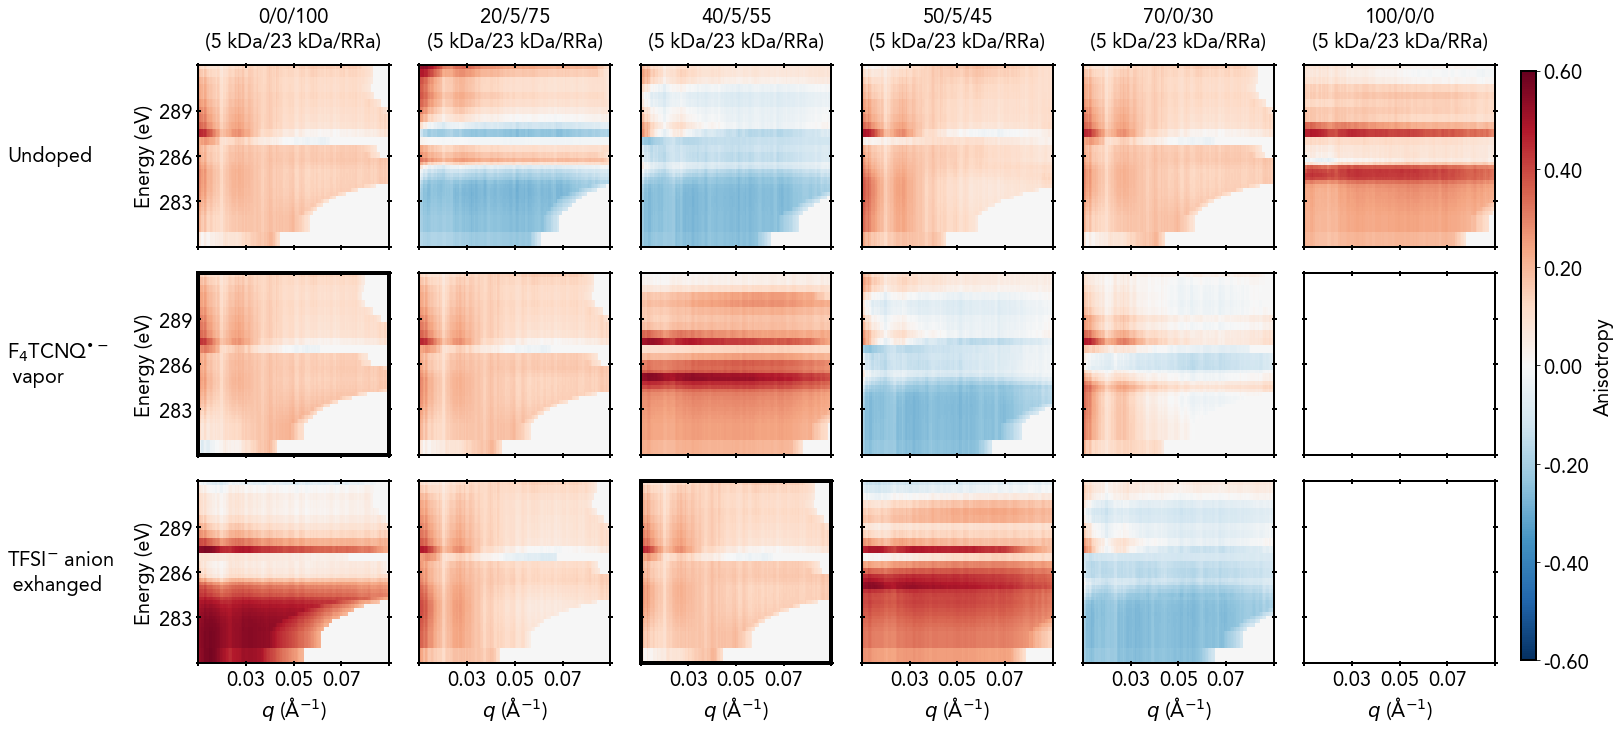

In [145]:
# Pick an edge of the data to work with
current_edge = 'C 1s'

start_en, end_en, en_rounding_order, start_q, end_q, q_rounding_order = 280, 292, 1, 0.01, 0.09, 0.01

scales = [0.6]

[fig, axes] = plot_AR(data_dict, scales, start_en, end_en, en_rounding_order, start_q, end_q, q_rounding_order)

save_fig(fig, -1, r'C:\Users\Phong\Desktop\CyRSoXS', 'CyRSoXS', 300)

In [16]:
plt.rcParams['font.size'] = 20
plt.rcParams['axes.linewidth'] = 2

def plot_AR(dicts, scales, start_en, end_en, en_rounding_order, start_q, end_q, q_rounding_order):
    fig, axes = plt.subplots(3, 1, figsize=(15, 3.5*3))
    
    x_ticks = generate_ticks(start_q, end_q, num_ticks=4, rounding_order=q_rounding_order)
    y_ticks = generate_ticks(start_en, end_en, num_ticks=5, rounding_order=en_rounding_order)

    for j in range(3):
        for i in range(1):
            idx = i*3+j
            if idx < len(dicts['ARs']):
                ax = axes[j]
                im = dicts['ARs'][idx].sel(energy=slice(start_en, end_en), q=slice(start_q, end_q)).plot(
                    x='q', y='energy', ax=ax, vmin=-np.nanmax(scales), vmax=np.nanmax(scales),
                    cmap='RdBu_r', add_colorbar=False
                )

#                 ax.text(0.035, 0.875, dicts['crystal_mol_frac'][idx], color='black', fontsize=18,
#                         transform=ax.transAxes, horizontalalignment='left',
#                         bbox=dict(facecolor='white', edgecolor='white', alpha=0.75))

                ax.set_xticklabels('')
                ax.set_yticklabels('')
                ax.set_xlabel('')
                ax.set_ylabel('')
                ax.set_xticks(x_ticks)
                ax.set_yticks(y_ticks)
                ax.set_xlim([start_q, end_q])
                ax.set_ylim([start_en, end_en])
                ax.xaxis.set_tick_params(which='both', size=5, width=2, direction='in', top='on')
                ax.yaxis.set_tick_params(which='both', size=5, width=2, direction='in', right='on')
            else:
                ax = axes[j]

#                 ax.text(0.035, 0.875, dicts['crystal_mol_frac'][idx], color='black', fontsize=18,
#                         transform=ax.transAxes, horizontalalignment='left',
#                         bbox=dict(facecolor='white', edgecolor='white', alpha=0.75))
                ax.set_xticklabels('')
                ax.set_yticklabels('')
                ax.set_xlabel('')
                ax.set_ylabel('')
                ax.set_xticks(x_ticks)
                ax.set_yticks(y_ticks)
                ax.set_xlim([start_q, end_q])
                ax.set_ylim([start_en, end_en])
                ax.xaxis.set_tick_params(which='both', size=5, width=2, direction='in', top='on')
                ax.yaxis.set_tick_params(which='both', size=5, width=2, direction='in', right='on')

    # format title and labels
    top_labels = ['']
    for i, label in enumerate(top_labels):
        ax = axes[i]
        ax.text(0.5, 1.2, label, color='black', fontsize=20, transform=ax.transAxes,
                horizontalalignment='center', verticalalignment='center')
        ax = axes[-1]
        ax.set_xlabel('$\it{q}$ (Å$^{-1}$)', fontsize=20)
        x_ticks_strs = [f'{value:.{3}f}' for value in x_ticks]
        x_ticks_strs[0] = ''
        x_ticks_strs[-1] = ''
        ax.set_xticklabels(x_ticks_strs)

    for i, label in enumerate(['Undoped', 'F$_{4}$TCNQ$^{•-}$ \n vapor', 'TFSI$^{-}$ anion \n exhanged']):
        ax = axes[i]
        ax.set_ylabel('Energy (eV)', fontsize=20)
        y_ticks_strs = [str(value) for value in y_ticks]
        y_ticks_strs[0] = ''
        y_ticks_strs[-1] = ''
        ax.set_yticklabels(y_ticks_strs)
        ax.text(-1, 0.5, label, color='black', fontsize=20, transform=ax.transAxes,
                horizontalalignment='left', verticalalignment='center')

#     fig.suptitle(f'{current_edge} edge', fontsize=25, y=1, x=0.5)
    plt.tight_layout()

    # format colorbar
    cbar_ax = fig.add_axes([1, 0.11, 0.015, 0.85])
    cbar = fig.colorbar(im, cax=cbar_ax, format=FuncFormatter(fmt_AR))
    cbar.ax.set_ylabel('Anisotropy')

    plt.show()

    return fig, axes

In [17]:
pickle_save_name = 'PyHyperScattering_Batch_CyRSoXS_Average_Crystalline.pkl'
scan_save_name = 'CyRSoXS_Scans_Average_Crystalline.pkl'

with open(pickle_save_name, 'rb') as file:
    data = pickle.load(file)

data_dict = {}
del data_dict
data_dict = {'edges': data[0], 'ARs': data[1], 'paras': data[2], 'perps': data[3], 'circs': data[4], 'FY_NEXAFSs': data[5], 'Iq2s': data[6], 'ISIs': data[7], 'base_data_dirs': data[8], 'crystal_mol_frac': data[9], 'dopant_mol_frac': data[10], 'AR_min': data[11], 'AR_max': data[12]}

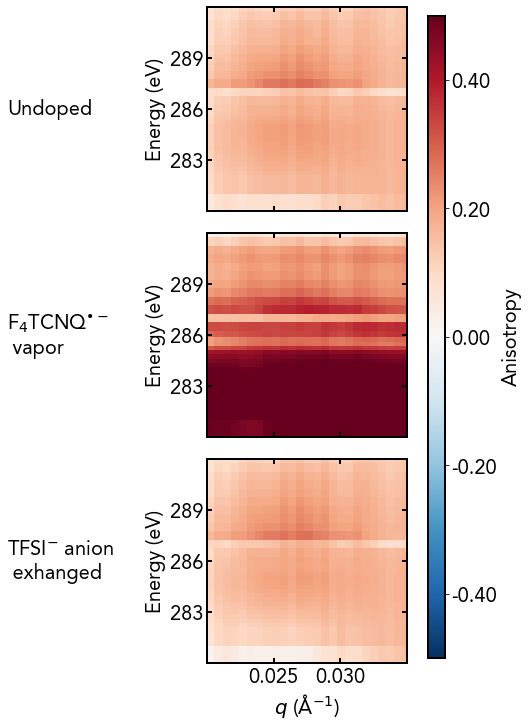

In [19]:
# Pick an edge of the data to work with
current_edge = 'C 1s'

start_en, end_en, en_rounding_order, start_q, end_q, q_rounding_order = 280, 292, 1, 0.02, 0.035, 0.001

scales = [0.5]

[fig, axes] = plot_AR(data_dict, scales, start_en, end_en, en_rounding_order, start_q, end_q, q_rounding_order)

save_fig(fig, -1, r'C:\Users\Phong\Desktop\CyRSoXS', 'CyRSoXS', 300)

In [ ]:
pickle_save_name = 'PyHyperScattering_Batch_CyRSoXS_C_Kedge_Reduced_F4TCNQ.pkl'

with open(pickle_save_name, 'rb') as file:
    data = pickle.load(file)

data_dict = {}
del data_dict
data_dict = {'edges': data[0], 'ARs': data[1], 'paras': data[2], 'perps': data[3], 'circs': data[4], 'FY_NEXAFSs': data[5], 'Iq2s': data[6], 'ISIs': data[7], 'base_data_dirs': data[8], 'crystal_mol_frac': data[9], 'dopant_mol_frac': data[10], 'AR_min': data[11], 'AR_max': data[12]}

In [306]:
def plot_AR(dicts, scales, start_en, end_en, en_rounding_order, start_q, end_q, q_rounding_order):
    
    def fmt_AR(x, pos):
        return '{:.1f}'.format(x)

    plt.rcParams['font.size'] = 20
    plt.rcParams['axes.linewidth'] = 2
    
    cmap = mpl.cm.RdBu_r
    cmap.set_bad((246/255, 246/255, 246/255), 1)
    
    fig, axes = plt.subplots(2, 4, figsize=(3.5*4, 3.75*2))  # Adjusted for 2 rows and 4 columns
    
    x_ticks = generate_ticks(start_q, end_q, num_ticks=4, rounding_order=q_rounding_order)
    y_ticks = generate_ticks(start_en, end_en, num_ticks=5, rounding_order=en_rounding_order)

    for j in range(2):  # Loop only for 2 rows
        for i in range(4):
            idx = j*4 + i
            if idx < len(dicts['ARs']):
                ax = axes[j, i]
                im = dicts['ARs'][idx].sel(energy=slice(start_en, end_en), q=slice(start_q, end_q)).plot(
                    x='q', y='energy', ax=ax, vmin=-np.nanmax(scales), vmax=np.nanmax(scales),
                    cmap=cmap, add_colorbar=False
                )
                
                ax.set_xticklabels('')
                ax.set_yticklabels('')
                ax.set_xlabel('')
                ax.set_ylabel('')
                ax.set_xticks(x_ticks)
                ax.set_yticks(y_ticks)
                ax.set_xlim([start_q, end_q])
                ax.set_ylim([start_en, end_en])
                ax.xaxis.set_tick_params(which='both', size=5, width=2, direction='in', top='on')
                ax.yaxis.set_tick_params(which='both', size=5, width=2, direction='in', right='on')
            else:
                ax = axes[j]
                ax.set_xticklabels('')
                ax.set_yticklabels('')
                ax.set_xlabel('')
                ax.set_ylabel('')
                ax.set_xticks(x_ticks)
                ax.set_yticks(y_ticks)
                ax.set_xlim([start_q, end_q])
                ax.set_ylim([start_en, end_en])
                ax.xaxis.set_tick_params(which='both', size=5, width=2, direction='in', top='on')
                ax.yaxis.set_tick_params(which='both', size=5, width=2, direction='in', right='on')    
    
    # format title and labels
    top_labels = ['Undoped', 'Uniform\nDoping', 'Amorphous\nDoping', 'Crystallite\nDoping']
    for i, label in enumerate(top_labels):
        ax = axes[0, i]
        ax.text(0.5, 1.3, label, color='black', fontsize=22, transform=ax.transAxes,
                horizontalalignment='center', verticalalignment='center')
        ax = axes[-1, i]
        ax.set_xlabel('$\it{q}$ (Å$^{-1}$)', fontsize=20)
#         ax.set_xlabel('$\it{q}$ (nm$^{-1}$)', fontsize=20)
        x_ticks_strs = [f'{value:.{3}f}' for value in x_ticks]
        x_ticks_strs[0] = ''
        x_ticks_strs[-1] = ''
        ax.set_xticklabels(x_ticks_strs)

    for i, label in enumerate(['TFSI$^{-}$\n(Isotropic)', 'F$_{4}$TCNQ$^{•-}$\n(Isotropic)']):
        ax = axes[i, 0]
        ax.set_ylabel('Energy (eV)', fontsize=20)
        y_ticks_strs = [str(value) for value in y_ticks]
        y_ticks_strs[0] = ''
        y_ticks_strs[-1] = ''
        ax.set_yticklabels(y_ticks_strs)
        ax.text(-0.875, 0.5, label, color='black', fontsize=22, transform=ax.transAxes,
                horizontalalignment='center', verticalalignment='center')


    # Resizing and repositioning colorbar
    cbar_ax = fig.add_axes([1, 0.15, 0.0125, 0.655])  # Adjust the position and height of the colorbar
    cbar = fig.colorbar(im, cax=cbar_ax, format=FuncFormatter(fmt_AR))
    cbar.ax.set_ylabel('Anisotropy')

    plt.tight_layout()
    plt.show()

    return fig, axes

In [307]:
pickle_save_name = 'PyHyperScattering_Batch_CyRSoXS_C_Kedge_Reduced_F4TCNQ.pkl'
scan_save_name = 'CyRSoXS_Scans_C_Kedge_Reduced_F4TCNQ.pkl'

with open(pickle_save_name, 'rb') as file:
    data = pickle.load(file)

data_dict = {}
del data_dict
data_dict = {'edges': data[0], 'ARs': data[1], 'paras': data[2], 'perps': data[3], 'circs': data[4], 'FY_NEXAFSs': data[5], 'Iq2s': data[6], 'ISIs': data[7], 'base_data_dirs': data[8], 'crystal_mol_frac': data[9], 'dopant_mol_frac': data[10], 'AR_min': data[11], 'AR_max': data[12]}

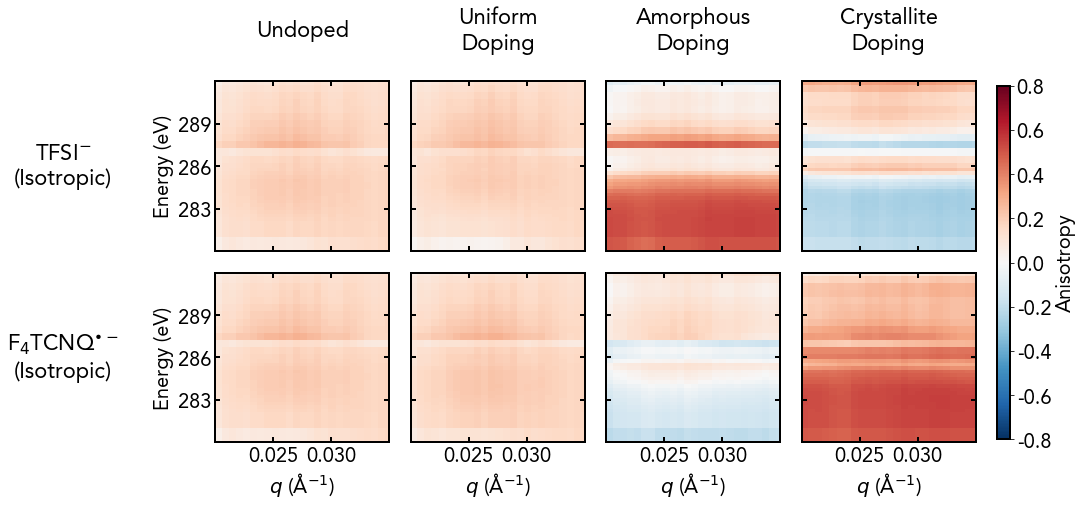

In [308]:
# Pick an edge of the data to work with
current_edge = 'C 1s'

start_en, end_en, en_rounding_order, start_q, end_q, q_rounding_order = 280, 292, 1, 0.02, 0.035, 0.001

scales = [0.8]

[fig, axes] = plot_AR(data_dict, scales, start_en, end_en, en_rounding_order, start_q, end_q, q_rounding_order)

save_fig(fig, -1, r'C:\Users\Phong\Desktop\CyRSoXS', 'CyRSoXS', 300)

In [217]:
def plot_AR(dicts, scales, start_en, end_en, en_rounding_order, start_q, end_q, q_rounding_order):
    plt.rcParams['font.size'] = 20
    plt.rcParams['axes.linewidth'] = 2

    fig, axes = plt.subplots(3, 3, figsize=(3.5*3, 3.25*3))  # Adjust for 3 rows and 3 columns
    
    x_ticks = generate_ticks(start_q, end_q, num_ticks=4, rounding_order=q_rounding_order)
    y_ticks = generate_ticks(start_en, end_en, num_ticks=5, rounding_order=en_rounding_order)

    for j in range(3):
        for i in range(3):
            idx = j*3 + i
            if idx < len(dicts['ARs']):
                ax = axes[j, i]
                im = dicts['ARs'][idx].sel(energy=slice(start_en, end_en), q=slice(start_q, end_q)).plot(
                    x='q', y='energy', ax=ax, vmin=-np.nanmax(scales), vmax=np.nanmax(scales),
                    cmap='RdBu_r', add_colorbar=False
                )

                ax.set_xticklabels('')
                ax.set_yticklabels('')
                ax.set_xlabel('')
                ax.set_ylabel('')
                ax.set_xticks(x_ticks)
                ax.set_yticks(y_ticks)
                ax.set_xlim([start_q, end_q])
                ax.set_ylim([start_en, end_en])
                ax.xaxis.set_tick_params(which='both', size=5, width=2, direction='in', top='on')
                ax.yaxis.set_tick_params(which='both', size=5, width=2, direction='in', right='on')
            else:
                ax = axes[j, i]
                ax.set_xticklabels('')
                ax.set_yticklabels('')
                ax.set_xlabel('')
                ax.set_ylabel('')
                ax.set_xticks(x_ticks)
                ax.set_yticks(y_ticks)
                ax.set_xlim([start_q, end_q])
                ax.set_ylim([start_en, end_en])
                ax.xaxis.set_tick_params(which='both', size=5, width=2, direction='in', top='on')
                ax.yaxis.set_tick_params(which='both', size=5, width=2, direction='in', right='on')

    # format title and labels
    top_labels = ['Uniform\nDoping', 'Amorphous\nDoping', 'Crystallite\nDoping']
    for i, label in enumerate(top_labels):
        ax = axes[0, i]
        ax.text(0.5, 1.3, label, color='black', fontsize=22, transform=ax.transAxes,
                horizontalalignment='center', verticalalignment='center')
        ax = axes[-1, i]
        ax.set_xlabel('$\it{q}$ (Å$^{-1}$)', fontsize=20)
#         ax.set_xlabel('$\it{q}$ (nm$^{-1}$)', fontsize=20)
        x_ticks_strs = [f'{value:.{3}f}' for value in x_ticks]
        x_ticks_strs[0] = ''
        x_ticks_strs[-1] = ''
        ax.set_xticklabels(x_ticks_strs)

    for i, label in enumerate(['Undoped', 'TFSI$^{-}$\n(Isotropic)', 'F$_{4}$TCNQ$^{•-}$\n(Isotropic)']):
        ax = axes[i, 0]
        ax.set_ylabel('Energy (eV)', fontsize=20)
        y_ticks_strs = [str(value) for value in y_ticks]
        y_ticks_strs[0] = ''
        y_ticks_strs[-1] = ''
        ax.set_yticklabels(y_ticks_strs)
        ax.text(-0.875, 0.5, label, color='black', fontsize=22, transform=ax.transAxes,
                horizontalalignment='center', verticalalignment='center')

    # Adjust the colorbar position and size to match the new layout
    cbar_ax = fig.add_axes([1.01, 0.12, 0.02, 0.74])  # Adjust the position and size of the colorbar
    cbar = fig.colorbar(im, cax=cbar_ax, format=FuncFormatter(fmt_AR))
    cbar.ax.set_ylabel('Anisotropy')

    plt.tight_layout()
    plt.show()

    return fig, axes

In [242]:
pickle_save_name = 'PyHyperScattering_Batch_CyRSoXS_C_Kedge_Reduced_F4TCNQ_No_Orientation.pkl'
scan_save_name = 'CyRSoXS_Scans_C_Kedge_Reduced_F4TCNQ_No_Orientation.pkl'

with open(pickle_save_name, 'rb') as file:
    data = pickle.load(file)

data_dict = {}
del data_dict
data_dict = {'edges': data[0], 'ARs': data[1], 'paras': data[2], 'perps': data[3], 'circs': data[4], 'FY_NEXAFSs': data[5], 'Iq2s': data[6], 'ISIs': data[7], 'base_data_dirs': data[8], 'crystal_mol_frac': data[9], 'dopant_mol_frac': data[10], 'AR_min': data[11], 'AR_max': data[12]}

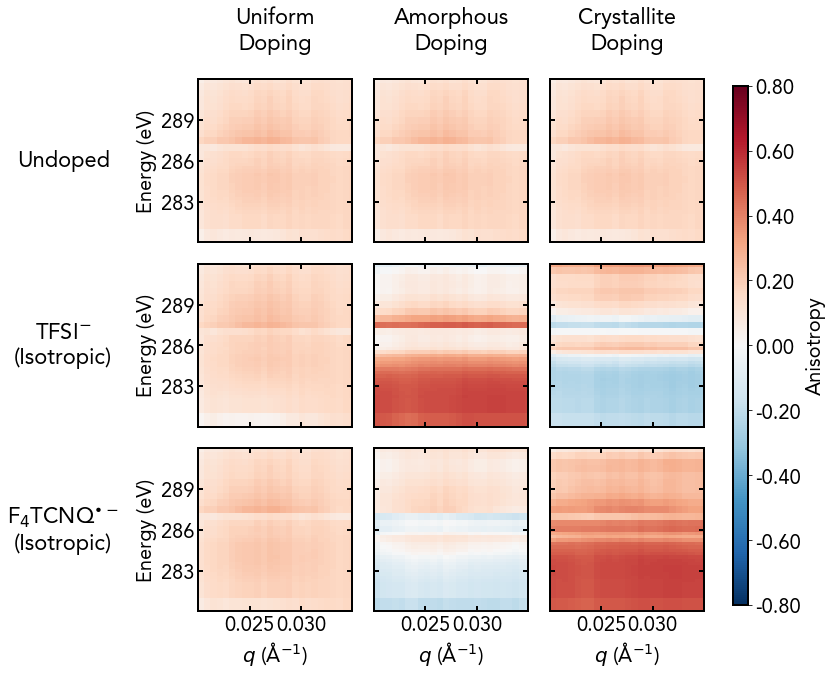

In [244]:
# Pick an edge of the data to work with
current_edge = 'C 1s'

start_en, end_en, en_rounding_order, start_q, end_q, q_rounding_order = 280, 292, 1, 0.02, 0.035, 0.001

scales = [0.8]

[fig, axes] = plot_AR(data_dict, scales, start_en, end_en, en_rounding_order, start_q, end_q, q_rounding_order)

save_fig(fig, -1, r'C:\Users\Phong\Desktop\CyRSoXS', 'CyRSoXS', 300)

In [303]:
def plot_AR(dicts, scales, start_en, end_en, en_rounding_order, start_q, end_q, q_rounding_order):
    
    def fmt_AR(x, pos):
        return '{:.2f}'.format(x)
    
    plt.rcParams['font.size'] = 20
    plt.rcParams['axes.linewidth'] = 2
    
    cmap = mpl.cm.RdBu_r
    cmap.set_bad((246/255, 246/255, 246/255), 1)
    
    fig, axes = plt.subplots(3, 4, figsize=(3.5*4, 3.5*3))  # Adjusted for 3 rows and 4 columns
    
    x_ticks = generate_ticks(start_q, end_q, num_ticks=4, rounding_order=q_rounding_order)
    y_ticks = generate_ticks(start_en, end_en, num_ticks=5, rounding_order=en_rounding_order)

    for j in range(3):  # Loop for 3 rows
        for i in range(4):
            idx = (j + 1) * 4 + i  # Adjust the index to start from the second row of the original data
            if idx < len(dicts['ARs']):
                ax = axes[j, i]
                im = dicts['ARs'][idx].sel(energy=slice(start_en, end_en), q=slice(start_q, end_q)).plot(
                    x='q', y='energy', ax=ax, vmin=-np.nanmax(scales), vmax=np.nanmax(scales),
                    cmap=cmap, add_colorbar=False
                )
                
                ax.set_xticklabels('')
                ax.set_yticklabels('')
                ax.set_xlabel('')
                ax.set_ylabel('')
                ax.set_xticks(x_ticks)
                ax.set_yticks(y_ticks)
                ax.set_xlim([start_q, end_q])
                ax.set_ylim([start_en, end_en])
                ax.xaxis.set_tick_params(which='both', size=5, width=2, direction='in', top='on')
                ax.yaxis.set_tick_params(which='both', size=5, width=2, direction='in', right='on')
            else:
                ax = axes[j, i]
                ax.set_xticklabels('')
                ax.set_yticklabels('')
                ax.set_xlabel('')
                ax.set_ylabel('')
                ax.set_xticks(x_ticks)
                ax.set_yticks(y_ticks)
                ax.set_xlim([start_q, end_q])
                ax.set_ylim([start_en, end_en])
                ax.xaxis.set_tick_params(which='both', size=5, width=2, direction='in', top='on')
                ax.yaxis.set_tick_params(which='both', size=5, width=2, direction='in', right='on')    

    # format title and labels
    top_labels = ['Undoped', 'Uniform\nDoping', 'Amorphous\nDoping', 'Crystallite\nDoping']
    for i, label in enumerate(top_labels):
        ax = axes[0, i]
        ax.text(0.5, 1.3, label, color='black', fontsize=22, transform=ax.transAxes,
                horizontalalignment='center', verticalalignment='center')
        ax = axes[-1, i]
        ax.set_xlabel('$\it{q}$ (Å$^{-1}$)', fontsize=20)
        x_ticks_strs = [f'{value:.{3}f}' for value in x_ticks]
        x_ticks_strs[0] = ''
        x_ticks_strs[-1] = ''
        ax.set_xticklabels(x_ticks_strs)

    for i, label in enumerate(['F$_{4}$TCNQ\n(Isotropic)',
                  'F$_{4}$TCNQ$^{•-}$\n(Aligned)', 'F$_{4}$TCNQ$^{•-}$\n(Antialigned)']):  # Adjusted labels for 3 rows
        ax = axes[i, 0]
        ax.set_ylabel('Energy (eV)', fontsize=20)
        y_ticks_strs = [str(value) for value in y_ticks]
        y_ticks_strs[0] = ''
        y_ticks_strs[-1] = ''
        ax.set_yticklabels(y_ticks_strs)
        ax.text(-0.875, 0.5, label, color='black', fontsize=22, transform=ax.transAxes,
                horizontalalignment='center', verticalalignment='center')

    # Resizing and repositioning colorbar
    cbar_ax = fig.add_axes([1, 0.11, 0.0125, 0.76])  # Adjust the position and height of the colorbar
    cbar = fig.colorbar(im, cax=cbar_ax, format=FuncFormatter(fmt_AR))
    cbar.ax.set_ylabel('Anisotropy')

    plt.tight_layout()
    plt.show()

    return fig, axes

In [304]:
pickle_save_name = 'PyHyperScattering_Batch_CyRSoXS_N_Kedge_Reduced_F4TCNQ.pkl'
scan_save_name = 'CyRSoXS_Scans_N_Kedge_Reduced_F4TCNQ.pkl'

with open(pickle_save_name, 'rb') as file:
    data = pickle.load(file)

data_dict = {}
del data_dict
data_dict = {'edges': data[0], 'ARs': data[1], 'paras': data[2], 'perps': data[3], 'circs': data[4], 'FY_NEXAFSs': data[5], 'Iq2s': data[6], 'ISIs': data[7], 'base_data_dirs': data[8], 'crystal_mol_frac': data[9], 'dopant_mol_frac': data[10], 'AR_min': data[11], 'AR_max': data[12]}

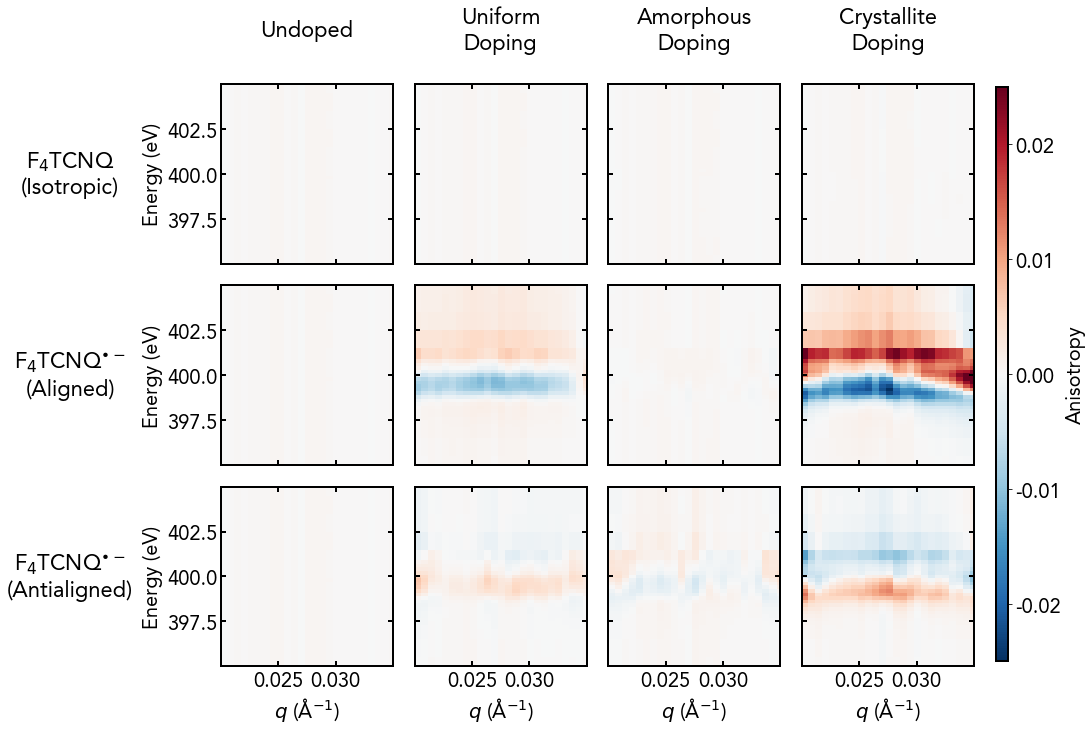

In [305]:
# Pick an edge of the data to work with
current_edge = 'N 1s'

start_en, end_en, en_rounding_order, start_q, end_q, q_rounding_order = 395, 405, 0.1, 0.02, 0.035, 0.001

scales = [0.025]

[fig, axes] = plot_AR(data_dict, scales, start_en, end_en, en_rounding_order, start_q, end_q, q_rounding_order)

save_fig(fig, -1, r'C:\Users\Phong\Desktop\CyRSoXS', 'CyRSoXS_N1s_Orientation', 300)

In [294]:
pickle_save_name = 'PyHyperScattering_Batch_CyRSoXS_C_Kedge_Reduced_F4TCNQ.pkl'
scan_save_name = 'CyRSoXS_Scans_C_Kedge_Reduced_F4TCNQ.pkl'

with open(pickle_save_name, 'rb') as file:
    data = pickle.load(file)

data_dict = {}
del data_dict
data_dict = {'edges': data[0], 'ARs': data[1], 'paras': data[2], 'perps': data[3], 'circs': data[4], 'FY_NEXAFSs': data[5], 'Iq2s': data[6], 'ISIs': data[7], 'base_data_dirs': data[8], 'crystal_mol_frac': data[9], 'dopant_mol_frac': data[10], 'AR_min': data[11], 'AR_max': data[12]}

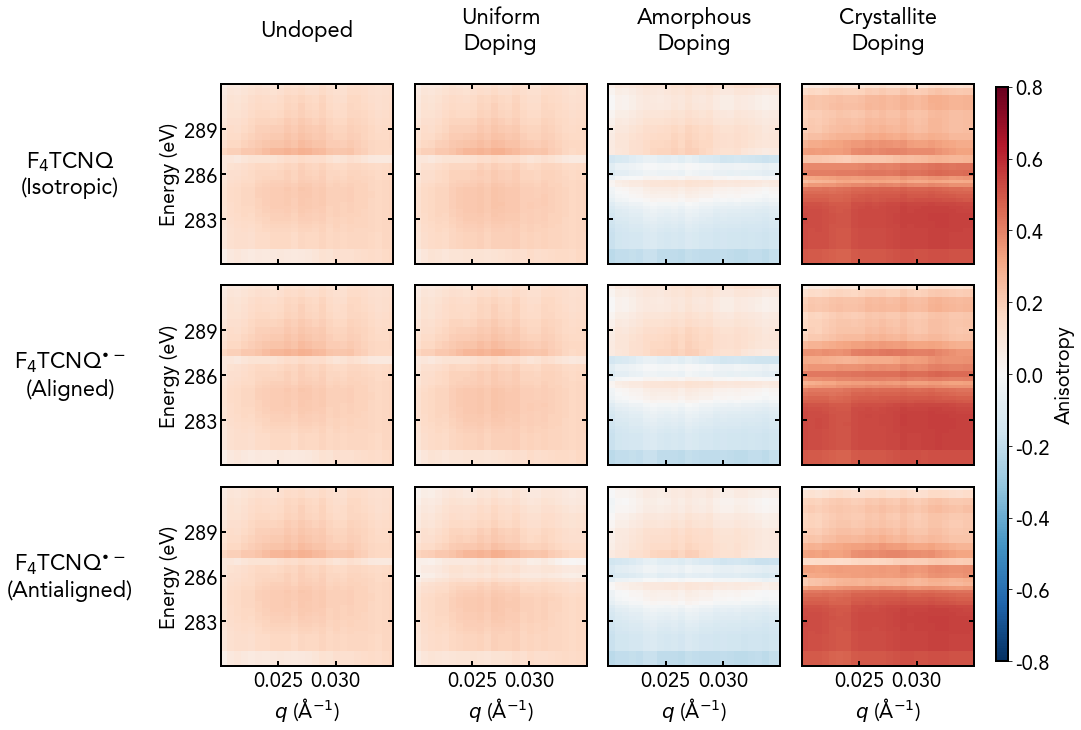

In [295]:
# Pick an edge of the data to work with
current_edge = 'C 1s'

start_en, end_en, en_rounding_order, start_q, end_q, q_rounding_order = 280, 292, 1, 0.02, 0.035, 0.001

scales = [0.8]

[fig, axes] = plot_AR(data_dict, scales, start_en, end_en, en_rounding_order, start_q, end_q, q_rounding_order)

save_fig(fig, -1, r'C:\Users\Phong\Desktop\CyRSoXS', 'CyRSoXS_C1s_Orientation', 300)

In [271]:
pickle_save_name = 'PyHyperScattering_Batch_CyRSoXS_F_Kedge_Reduced_F4TCNQ.pkl'
scan_save_name = 'CyRSoXS_Scans_F_Kedge_Reduced_F4TCNQ.pkl'

with open(pickle_save_name, 'rb') as file:
    data = pickle.load(file)

data_dict = {}
del data_dict
data_dict = {'edges': data[0], 'ARs': data[1], 'paras': data[2], 'perps': data[3], 'circs': data[4], 'FY_NEXAFSs': data[5], 'Iq2s': data[6], 'ISIs': data[7], 'base_data_dirs': data[8], 'crystal_mol_frac': data[9], 'dopant_mol_frac': data[10], 'AR_min': data[11], 'AR_max': data[12]}

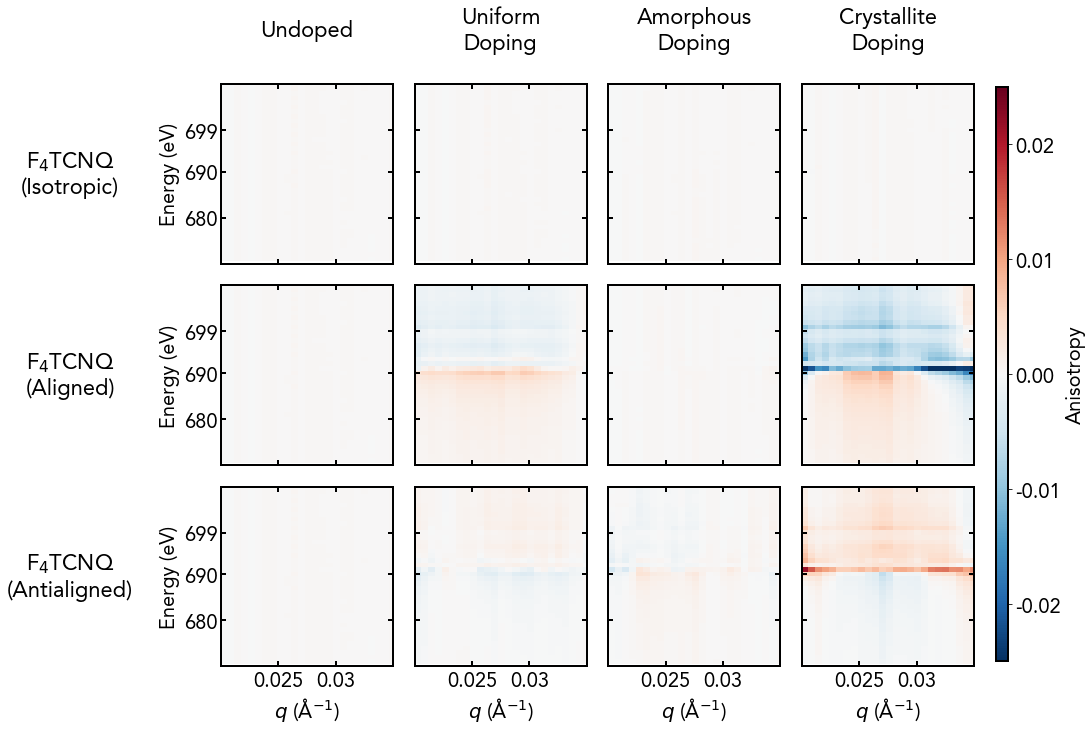

In [274]:
# Pick an edge of the data to work with
current_edge = 'F 1s'

start_en, end_en, en_rounding_order, start_q, end_q, q_rounding_order = 670, 709, 1, 0.02, 0.035, 0.001

scales = [0.025]

[fig, axes] = plot_AR(data_dict, scales, start_en, end_en, en_rounding_order, start_q, end_q, q_rounding_order)

save_fig(fig, -1, r'C:\Users\Phong\Desktop\CyRSoXS', 'CyRSoXS', 300)

In [42]:
def plot_AR(dicts, scales, start_en, end_en, en_rounding_order, start_q, end_q, q_rounding_order):
    
    def fmt_AR(x, pos):
        return '{:.2f}'.format(x)
    
    plt.rcParams['font.size'] = 22
    plt.rcParams['axes.linewidth'] = 2
    
    cmap = mpl.cm.RdBu_r
    cmap.set_bad((246/255, 246/255, 246/255), 1)
    
    fig, axes = plt.subplots(1, 3, figsize=(3.5*3, 4.25*1))  # Adjusted for 3 rows and 4 columns
    
    x_ticks = generate_ticks(start_q, end_q, num_ticks=4, rounding_order=q_rounding_order)
    y_ticks = generate_ticks(start_en, end_en, num_ticks=4, rounding_order=en_rounding_order)

    for j in range(1): 
        for i in range(3):
            idx = i
            if idx < len(dicts['ARs']):
                ax = axes[i]
                im = dicts['ARs'][idx].sel(energy=slice(start_en, end_en), q=slice(start_q, end_q)).plot(
                    x='q', y='energy', ax=ax, vmin=-np.nanmax(scales), vmax=np.nanmax(scales),
                    cmap=cmap, add_colorbar=False
                )
                
                ax.set_xticklabels('')
                ax.set_yticklabels('')
                ax.set_xlabel('')
                ax.set_ylabel('')
                ax.set_xticks(x_ticks)
                ax.set_yticks(y_ticks)
                ax.set_xlim([start_q, end_q])
                ax.set_ylim([start_en, end_en])
                ax.xaxis.set_tick_params(which='both', size=5, width=2, direction='in', top='on')
                ax.yaxis.set_tick_params(which='both', size=5, width=2, direction='in', right='on')
            else:
                ax = axes[j, i]
                ax.set_xticklabels('')
                ax.set_yticklabels('')
                ax.set_xlabel('')
                ax.set_ylabel('')
                ax.set_xticks(x_ticks)
                ax.set_yticks(y_ticks)
                ax.set_xlim([start_q, end_q])
                ax.set_ylim([start_en, end_en])
                ax.xaxis.set_tick_params(which='both', size=5, width=2, direction='in', top='on')
                ax.yaxis.set_tick_params(which='both', size=5, width=2, direction='in', right='on')    

    # format title and labels
#     top_labels = ['Isotropic', 'Aligned', 'Antialigned']
    top_labels = ['', '', '']
    for j, label in enumerate(top_labels):
        ax = axes[j]
        ax.text(0.5, 1.2, label, color='black', fontsize=22, transform=ax.transAxes,
                horizontalalignment='center', verticalalignment='center')
        ax = axes[j]
        ax.set_xlabel('$\it{q}$ (Å$^{-1}$)', fontsize=25)
        x_ticks_strs = [f'{value:.{3}f}' for value in x_ticks]
        x_ticks_strs[0] = ''
        x_ticks_strs[-1] = ''
        ax.set_xticklabels(x_ticks_strs)
#         ax.set_xlabel('', fontsize=20)
#         x_ticks_strs = [f'{value:.{3}f}' for value in x_ticks]
#         ax.set_xticklabels('')

    for i in range (1):
        ax = axes[i]
        ax.set_ylabel('Energy (eV)', fontsize=25)
        y_ticks_strs = [str(value) for value in y_ticks]
#         y_ticks_strs[0] = ''
#         y_ticks_strs[-1] = ''
        ax.set_yticklabels(y_ticks_strs)
#         ax.text(-0.875, 0.5, label, color='black', fontsize=22, transform=ax.transAxes,
#                 horizontalalignment='center', verticalalignment='center')

    # Resizing and repositioning colorbar
    cbar_ax = fig.add_axes([1, 0.28, 0.0125, 0.61])  # Adjust the position and height of the colorbar
    cbar = fig.colorbar(im, cax=cbar_ax, format=FuncFormatter(fmt_AR))
    cbar.ax.set_ylabel('Anisotropy', fontsize = 25)
    cbar.ax.tick_params(pad = 55)
    plt.setp(cbar.ax.get_yticklabels(), ha = "right")

    plt.tight_layout()
    plt.show()

    return fig, axes

In [43]:
pickle_save_name = 'PyHyperScattering_Batch_CyRSoXS_C_Kedge_Reduced_F4TCNQ_Orientation.pkl'
scan_save_name = 'CyRSoXS_Scans_C_Kedge_Reduced_F4TCNQ_Orientation.pkl'

with open(pickle_save_name, 'rb') as file:
    data = pickle.load(file)

data_dict = {}
del data_dict
data_dict = {'edges': data[0], 'ARs': data[1], 'paras': data[2], 'perps': data[3], 'circs': data[4], 'FY_NEXAFSs': data[5], 'Iq2s': data[6], 'ISIs': data[7], 'base_data_dirs': data[8], 'crystal_mol_frac': data[9], 'dopant_mol_frac': data[10], 'AR_min': data[11], 'AR_max': data[12]}

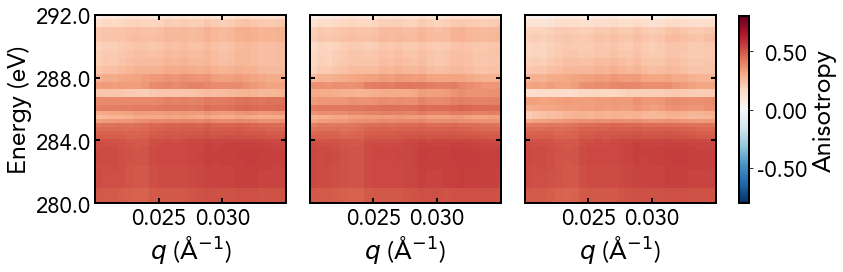

In [44]:
# Pick an edge of the data to work with
current_edge = 'C 1s'

start_en, end_en, en_rounding_order, start_q, end_q, q_rounding_order = 280, 292, 0.1, 0.02, 0.035, 0.001

scales = [0.8]

[fig, axes] = plot_AR(data_dict, scales, start_en, end_en, en_rounding_order, start_q, end_q, q_rounding_order)

save_fig(fig, -1, r'C:\Users\Phong\Desktop\CyRSoXS', 'CyRSoXS_C1s_Orientation', 300)

In [45]:
pickle_save_name = 'PyHyperScattering_Batch_CyRSoXS_N_Kedge_Reduced_F4TCNQ_Orientation.pkl'
scan_save_name = 'CyRSoXS_Scans_N_Kedge_Reduced_F4TCNQ_Orientation.pkl'

with open(pickle_save_name, 'rb') as file:
    data = pickle.load(file)

data_dict = {}
del data_dict
data_dict = {'edges': data[0], 'ARs': data[1], 'paras': data[2], 'perps': data[3], 'circs': data[4], 'FY_NEXAFSs': data[5], 'Iq2s': data[6], 'ISIs': data[7], 'base_data_dirs': data[8], 'crystal_mol_frac': data[9], 'dopant_mol_frac': data[10], 'AR_min': data[11], 'AR_max': data[12]}

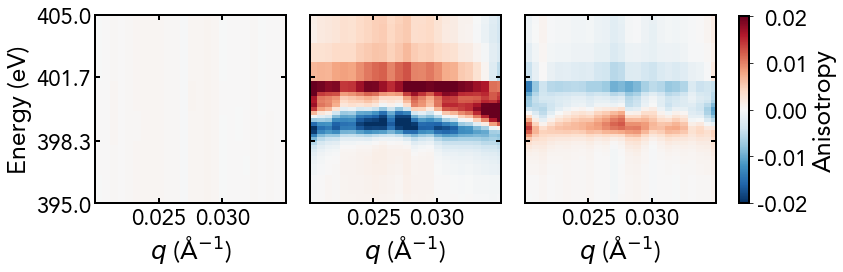

In [46]:
# Pick an edge of the data to work with
current_edge = 'N 1s'

start_en, end_en, en_rounding_order, start_q, end_q, q_rounding_order = 395, 405, 0.1, 0.02, 0.035, 0.001

scales = [0.02]

[fig, axes] = plot_AR(data_dict, scales, start_en, end_en, en_rounding_order, start_q, end_q, q_rounding_order)

save_fig(fig, -1, r'C:\Users\Phong\Desktop\CyRSoXS', 'CyRSoXS_N1s_Orientation', 300)

In [55]:
pickle_save_name = 'PyHyperScattering_Batch_CyRSoXS_F_Kedge_Reduced_F4TCNQ_Orientation.pkl'
scan_save_name = 'CyRSoXS_Scans_F_Kedge_Reduced_F4TCNQ_Orientation.pkl'

with open(pickle_save_name, 'rb') as file:
    data = pickle.load(file)

data_dict = {}
del data_dict
data_dict = {'edges': data[0], 'ARs': data[1], 'paras': data[2], 'perps': data[3], 'circs': data[4], 'FY_NEXAFSs': data[5], 'Iq2s': data[6], 'ISIs': data[7], 'base_data_dirs': data[8], 'crystal_mol_frac': data[9], 'dopant_mol_frac': data[10], 'AR_min': data[11], 'AR_max': data[12]}

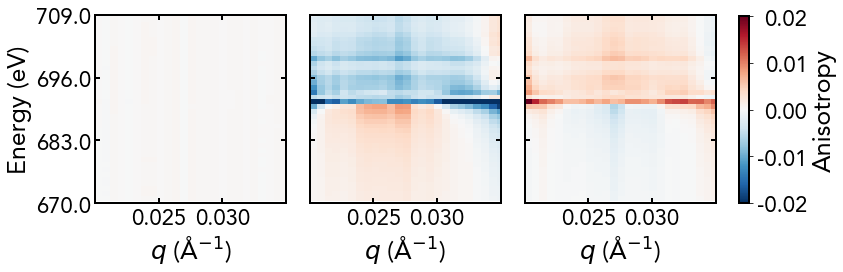

In [56]:
# Pick an edge of the data to work with
current_edge = 'F 1s'

start_en, end_en, en_rounding_order, start_q, end_q, q_rounding_order = 670, 709, 0.1, 0.02, 0.035, 0.001

scales = [0.02]

[fig, axes] = plot_AR(data_dict, scales, start_en, end_en, en_rounding_order, start_q, end_q, q_rounding_order)

save_fig(fig, -1, r'C:\Users\Phong\Desktop\CyRSoXS', 'CyRSoXS_F1s_Orientation', 300)